# Notebook to run basic `scanpy` QC and doublet detection with `scrublet` for SRA Project - PRJNA847259

- **Developed by**: Srivalli Kolla

- **Created date** : 14 October, 2024

- **Modification date** : 23 October, 2024

- **Würzburg Institute for Systems Immunology & Julius-Maximilian-Universität Würzburg**

Env : Scanpy(Python 3.12.4)

# Import sample_names

In [1]:
import anndata
import logging
import anndata as ad
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import scrublet as scr
import os
import time
import matplotlib.pyplot as plt
from statsmodels.robust.scale import mad as median_abs_deviation
from matplotlib import colors
from matplotlib import rcParams

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')
timestamp = time.strftime("%d_%m_%Y")

-----
anndata     0.10.8
scanpy      1.10.2
-----
PIL                 10.3.0
asttokens           NA
attr                23.2.0
cffi                1.16.0
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.2
decorator           5.1.1
defusedxml          0.7.1
distutils           3.12.4
django              5.0.6
executing           2.0.1
h5py                3.11.0
igraph              0.11.5
ipykernel           6.29.5
ipython_genutils    0.2.0
ipywidgets          8.1.3
jedi                0.19.1
joblib              1.4.2
kiwisolver          1.4.5
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.43.0
louvain             0.8.2
matplotlib          3.8.4
mpl_toolkits        NA
natsort             8.4.0
numba               0.60.0
numexpr             2.10.1
numpy               1.26.4
packaging           24.1
pandas              2.2.2
parso               0.8.4
patsy  

# Import sample_names

In [3]:
path = '../ncbi_sra/data'
files = ['SRR23391976.h5ad',
'SRR23391977.h5ad']

In [4]:
adata_combined = None
vars_combined = []

for file in files:
    file_path = os.path.join(path, file)
    
    try:

        adata = sc.read_h5ad(file_path)

        sample_name = os.path.basename(file_path).split('.')[0]
        adata.obs['sample_name'] = sample_name


        sc.pp.filter_cells(adata, min_counts=10)
        sc.pp.filter_genes(adata, min_counts=10)


        adata.var_names = adata.var_names.str.split('.').str[0]
        adata.var_names = [f"{name}_{sample_name}" for name in adata.var_names]

        vars_combined.extend(adata.var_names)


        if adata_combined is None:
            adata_combined = adata
        else:
            adata_combined = sc.concat([adata_combined, adata], join='outer', index_unique='-')

        print(f"Successfully read and concatenated: {file}")

    except Exception as e:
        print(f"Error reading {file}: {e}")

unique_var_names = pd.Series(vars_combined).unique()
adata_combined.var_names = unique_var_names[:adata_combined.n_vars] 
adata_combined

filtered out 6794426 cells that have less than 10 counts
filtered out 62783 genes that are detected in less than 10 counts
Successfully read and concatenated: SRR23391976.h5ad
filtered out 6794436 cells that have less than 10 counts
filtered out 62787 genes that are detected in less than 10 counts
Successfully read and concatenated: SRR23391977.h5ad


AnnData object with n_obs × n_vars = 898 × 602
    obs: 'sample_name', 'n_counts'

In [5]:
adata_combined

AnnData object with n_obs × n_vars = 898 × 602
    obs: 'sample_name', 'n_counts'

In [6]:
adata_combined.obs

,sample_name,n_counts
AAACCCAAGAGGCGGA-0,SRR23391976,18
AAACCCAGTCTCCACT-0,SRR23391976,12
AAACCCATCTCTACCA-0,SRR23391976,12
AAAGTGAAGAAATCCA-0,SRR23391976,19
AAAGTGAAGAGCATAT-0,SRR23391976,31
...,...,...
TTGTTGTAGCCACAGG-1,SRR23391977,132
TTTACGTAGACCAGCA-1,SRR23391977,38
TTTACTGCACCGGTCA-1,SRR23391977,11
TTTGGTTAGCATTGAA-1,SRR23391977,10


In [7]:
adata_combined.var

""
ENSG00000131697_SRR23391976
ENSG00000171735_SRR23391976
ENSG00000188807_SRR23391976
ENSG00000189337_SRR23391976
ENSG00000117395_SRR23391976
...
ENSG00000189108_SRR23391977
ENSG00000009694_SRR23391977
ENSG00000225689_SRR23391977
ENSG00000129682_SRR23391977


In [8]:
adata_combined.obs['sample_name'].value_counts()

sample_name
SRR23391976    454
SRR23391977    444
Name: count, dtype: int64

## Doublet score prediction

In [9]:
scrub = scr.Scrublet(adata_combined.X)

doublet_scores, predicted_doublets = scrub.scrub_doublets()
            
adata_combined.obs['doublet_scores'] = doublet_scores
adata_combined.obs['predicted_doublets'] = predicted_doublets

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.11
Detected doublet rate = 21.3%
Estimated detectable doublet fraction = 26.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 79.7%
Elapsed time: 0.1 seconds


/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/scrublet/helper_functions.py:321: RuntimeWarning: divide by zero encountered in divide
  w.setdiag(float(target_total) / tots_use)
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


In [10]:
adata_combined.obs

,sample_name,n_counts,doublet_scores,predicted_doublets
AAACCCAAGAGGCGGA-0,SRR23391976,18,0.139442,True
AAACCCAGTCTCCACT-0,SRR23391976,12,0.001206,False
AAACCCATCTCTACCA-0,SRR23391976,12,0.139442,True
AAAGTGAAGAAATCCA-0,SRR23391976,19,0.097179,False
AAAGTGAAGAGCATAT-0,SRR23391976,31,0.001206,False
...,...,...,...,...
TTGTTGTAGCCACAGG-1,SRR23391977,132,0.027875,False
TTTACGTAGACCAGCA-1,SRR23391977,38,0.001206,False
TTTACTGCACCGGTCA-1,SRR23391977,11,0.001206,False
TTTGGTTAGCATTGAA-1,SRR23391977,10,0.001206,False


### Checking the count and percentage of Doublets - sample_name level

In [11]:
doub_tab = pd.crosstab(adata_combined.obs['sample_name'],adata_combined.obs['predicted_doublets'])
doub_tab.sum()

predicted_doublets
False    707
True     191
dtype: int64

In [12]:
true_doublets = adata_combined.obs['predicted_doublets'] == True
true_doublets_count = true_doublets.sum()

true_doublets_percentage = (true_doublets_count / len(adata_combined.obs)) * 100

true_doublets_count ,true_doublets_percentage

(191, 21.26948775055679)

### Saving raw data

In [13]:
sample_name_object = adata_combined.copy()
sample_name_object

AnnData object with n_obs × n_vars = 898 × 602
    obs: 'sample_name', 'n_counts', 'doublet_scores', 'predicted_doublets'

## Compute QC stats

In [14]:
sample_name_object.shape

(898, 602)

### Labelling Mt and Ribo genes

In [15]:
sample_name_object.var

""
ENSG00000131697_SRR23391976
ENSG00000171735_SRR23391976
ENSG00000188807_SRR23391976
ENSG00000189337_SRR23391976
ENSG00000117395_SRR23391976
...
ENSG00000189108_SRR23391977
ENSG00000009694_SRR23391977
ENSG00000225689_SRR23391977
ENSG00000129682_SRR23391977


In [16]:
sample_name_object.var.index = sample_name_object.var.index.str.split('_').str[0]
sample_name_object.var

""
ENSG00000131697
ENSG00000171735
ENSG00000188807
ENSG00000189337
ENSG00000117395
...
ENSG00000189108
ENSG00000009694
ENSG00000225689
ENSG00000129682


In [17]:
sample_name_object.var['ensembl'] = sample_name_object.var.index
sample_name_object.var 

,ensembl
ENSG00000131697,ENSG00000131697
ENSG00000171735,ENSG00000171735
ENSG00000188807,ENSG00000188807
ENSG00000189337,ENSG00000189337
ENSG00000117395,ENSG00000117395
...,...
ENSG00000189108,ENSG00000189108
ENSG00000009694,ENSG00000009694
ENSG00000225689,ENSG00000225689
ENSG00000129682,ENSG00000129682


### Ensembl annotations

In [18]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("ensembl_gene_id")

In [19]:
annot.head()

,external_gene_name,start_position,end_position,chromosome_name
ensembl_gene_id,,,,
ENSG00000210049,MT-TF,577,647,MT
ENSG00000211459,MT-RNR1,648,1601,MT
ENSG00000210077,MT-TV,1602,1670,MT
ENSG00000210082,MT-RNR2,1671,3229,MT
ENSG00000209082,MT-TL1,3230,3304,MT


In [20]:
sample_name_object.var

,ensembl
ENSG00000131697,ENSG00000131697
ENSG00000171735,ENSG00000171735
ENSG00000188807,ENSG00000188807
ENSG00000189337,ENSG00000189337
ENSG00000117395,ENSG00000117395
...,...
ENSG00000189108,ENSG00000189108
ENSG00000009694,ENSG00000009694
ENSG00000225689,ENSG00000225689
ENSG00000129682,ENSG00000129682


In [21]:
sample_name_object.var['gene_name'] = sample_name_object.var.index.map(annot['external_gene_name'])
sample_name_object.var.index =sample_name_object.var['gene_name'] 
sample_name_object.var

,ensembl,gene_name
gene_name,,
NPHP4,ENSG00000131697,NPHP4
CAMTA1,ENSG00000171735,CAMTA1
TMEM201,ENSG00000188807,TMEM201
KAZN,ENSG00000189337,KAZN
EBNA1BP2,ENSG00000117395,EBNA1BP2
...,...,...
IL1RAPL2,ENSG00000189108,IL1RAPL2
TENM1,ENSG00000009694,TENM1
NaN,ENSG00000225689,NaN


In [22]:
sample_name_object.var['mt'] = sample_name_object.var_names.str.startswith('MT-') 
sample_name_object.var['ribo'] = sample_name_object.var_names.str.startswith(("RPS","RPL"))
sample_name_object.var

,ensembl,gene_name,mt,ribo
gene_name,,,,
NPHP4,ENSG00000131697,NPHP4,False,False
CAMTA1,ENSG00000171735,CAMTA1,False,False
TMEM201,ENSG00000188807,TMEM201,False,False
KAZN,ENSG00000189337,KAZN,False,False
EBNA1BP2,ENSG00000117395,EBNA1BP2,False,False
...,...,...,...,...
IL1RAPL2,ENSG00000189108,IL1RAPL2,False,False
TENM1,ENSG00000009694,TENM1,False,False
NaN,ENSG00000225689,NaN,NaN,NaN


In [23]:
ribo_counts = sample_name_object.var['ribo'].value_counts()

mt_counts = sample_name_object.var['mt'].value_counts()

print("Counts of Ribosomal (ribo) Genes:")
print("False:", ribo_counts.get(False, 0))
print("True:", ribo_counts.get(True, 0))
print("\nCounts of Mitochondrial (mt) Genes:")
print("False:", mt_counts.get(False, 0))
print("True:", mt_counts.get(True, 0))

Counts of Ribosomal (ribo) Genes:
False: 536
True: 1

Counts of Mitochondrial (mt) Genes:
False: 537
True: 0


In [24]:
sample_name_object.var['mt'] = sample_name_object.var['mt'].fillna(False)
sample_name_object.var['ribo'] = sample_name_object.var['ribo'].fillna(False)

/tmp/ipykernel_484237/2873467954.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sample_name_object.var['mt'] = sample_name_object.var['mt'].fillna(False)
/tmp/ipykernel_484237/2873467954.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sample_name_object.var['ribo'] = sample_name_object.var['ribo'].fillna(False)


### Calculating QC metrics per cell

In [25]:
sc.pp.calculate_qc_metrics(sample_name_object,qc_vars = ['mt','ribo'],inplace = True)

In [26]:
sample_name_object

AnnData object with n_obs × n_vars = 898 × 602
    obs: 'sample_name', 'n_counts', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo'
    var: 'ensembl', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

## Sex covariate analysis

### Chr Y genes calculation

In [27]:
sample_name_object.var['gene_name'] = sample_name_object.var['ensembl'].map(annot['external_gene_name'])
sample_name_object.var['chromosome'] = sample_name_object.var['ensembl'].map(annot['chromosome_name'])

In [28]:
sample_name_object.var

,ensembl,gene_name,mt,ribo,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,chromosome
gene_name,,,,,,,,,,,
NPHP4,ENSG00000131697,NPHP4,False,False,22,0.024499,0.024204,97.550111,22,3.135494,1
CAMTA1,ENSG00000171735,CAMTA1,False,False,11,0.012249,0.012175,98.775056,11,2.484907,1
TMEM201,ENSG00000188807,TMEM201,False,False,14,0.015590,0.015470,98.440980,14,2.708050,1
KAZN,ENSG00000189337,KAZN,False,False,11,0.012249,0.012175,98.775056,11,2.484907,1
EBNA1BP2,ENSG00000117395,EBNA1BP2,False,False,10,0.011136,0.011074,98.886414,10,2.397895,1
...,...,...,...,...,...,...,...,...,...,...,...
IL1RAPL2,ENSG00000189108,IL1RAPL2,False,False,10,0.011136,0.011074,98.886414,10,2.397895,X
TENM1,ENSG00000009694,TENM1,False,False,19,0.022272,0.022027,97.884187,20,3.044522,X
NaN,ENSG00000225689,NaN,False,False,16,0.017817,0.017661,98.218263,16,2.833213,X


In [29]:
chrY_genes = sample_name_object.var['chromosome'] == "Y"
chrY_genes

gene_name
NPHP4       False
CAMTA1      False
TMEM201     False
KAZN        False
EBNA1BP2    False
            ...  
IL1RAPL2    False
TENM1       False
NaN         False
FGF13       False
NaN         False
Name: chromosome, Length: 602, dtype: bool

In [30]:
sample_name_object.obs['percent_chrY'] = np.sum(
    sample_name_object[:, chrY_genes].X, axis = 1) / np.sum(sample_name_object.X, axis = 1) * 100

/tmp/ipykernel_484237/3978536326.py:1: RuntimeWarning: invalid value encountered in divide
  sample_name_object.obs['percent_chrY'] = np.sum(


In [31]:
sample_name_object

AnnData object with n_obs × n_vars = 898 × 602
    obs: 'sample_name', 'n_counts', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'percent_chrY'
    var: 'ensembl', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'chromosome'

### XIST counts

In [32]:
sample_name_object.var_names

Index([   'NPHP4',   'CAMTA1',  'TMEM201',     'KAZN', 'EBNA1BP2',    'AGBL4',
          'GLIS1',     'DAB1',   'ADGRL2',    'BCAR3',
       ...
            'PIR',        nan, 'IL1RAPL1',      'DMD',   'DIAPH2', 'IL1RAPL2',
          'TENM1',        nan,    'FGF13',        nan],
      dtype='object', name='gene_name', length=602)

In [33]:
valid_var_names = sample_name_object.var_names[~sample_name_object.var_names.isna()]

xist_genes = valid_var_names[valid_var_names.str.match('XIST')]


xist_genes

Index([], dtype='object', name='gene_name')

## Calculate cell cycle scores

### Downloading the list of cell cycle genes

In [34]:
!if [ ! -f ../ncbi_sra/data/regev_lab_cell_cycle_genes.txt ]; then curl -o ../ncbi_sra/data/regev_lab_cell_cycle_genes.txt https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt; fi

### Marking cell cycle genes

#### Steps followed

1. Loading genes and captilizing 
2. Printing the length of cell cycle genes list
3. Split genes into 2 lists (#First 43 genes,#Gene 43 to end)
4. Filtering cell cycle genes only if present in processed_gene_names
5. Print the list of cell cycle genes observed in our data

In [35]:
cell_cycle_genes = [x.strip() for x in open('../ncbi_sra/data/regev_lab_cell_cycle_genes.txt')]
#cell_cycle_genes = [gene.capitalize() for gene in cell_cycle_genes]
print(len(cell_cycle_genes))

s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_name_object.var_names]
print(len(cell_cycle_genes))

97
1


In [36]:
cell_cycle_genes

['CBX5']

### Creating basic anndata and normalization for cell cycle score calculation

In [37]:
adata_combined_log = anndata.AnnData(X = sample_name_object.X,  var = sample_name_object.var, obs = sample_name_object.obs)
sc.pp.normalize_total(adata_combined_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_combined_log)

normalizing counts per cell. The following highly-expressed genes are not considered during normalization factor computation:
['NPHP4', 'CAMTA1', 'TMEM201', 'KAZN', 'EBNA1BP2', 'AGBL4', 'GLIS1', 'DAB1', 'ADGRL2', 'BCAR3', 'RGS5', 'RABGAP1L', 'PAPPA2', 'COLGALT2', 'NIBAN1', 'HMCN1', 'LINC01036', 'nan', 'USH2A', 'ESRRG', 'SLC30A10', 'EFCAB2', 'SMYD3', 'LTBP1', 'LINC01320', 'THADA', 'CAMKMT', 'NRXN1', 'NRXN1-DT', 'LINC01798', 'CTNNA2', 'AFF3', 'UXS1', 'MIR4435-2HG', 'DPP10', 'nan', 'NCKAP5', 'THSD7B', 'LRP1B', 'GALNT13', 'RAPGEF4', 'TTN-AS1', 'PARD3B', 'ERBB4', 'nan', 'nan', 'CNTN4', 'GRM7', 'nan', 'SGO1-AS1', 'ZNF385D', 'UBE2E2', 'RARB', 'CACNA2D3', 'CFAP20DC-DT', 'FHIT', 'ROBO2', 'ROBO1', 'CADM2', 'ZBTB20', 'LSAMP', 'nan', 'KALRN', 'CLSTN2', 'PLS1', 'LINC02006', 'LINC01322', 'NAALADL2', 'SOX2-OT', 'LPP', 'FGF12', 'KCNIP4', 'nan', 'KCTD8', 'nan', 'ARHGAP24', 'CCSER1', 'GRID2', 'ANK2', 'UGT8', 'MAD2L1-DT', 'LINC01091', 'JADE1', 'LINC02511', 'MAML3', 'INPP4B', 'LRBA', 'FSTL5', 'MARCHF1', '

/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


### Cell cycle score calculation

In [38]:
adata_combined_log.var_names = adata_combined_log.var_names.astype(str)
adata_combined_log.var_names_make_unique()

## Data visualization

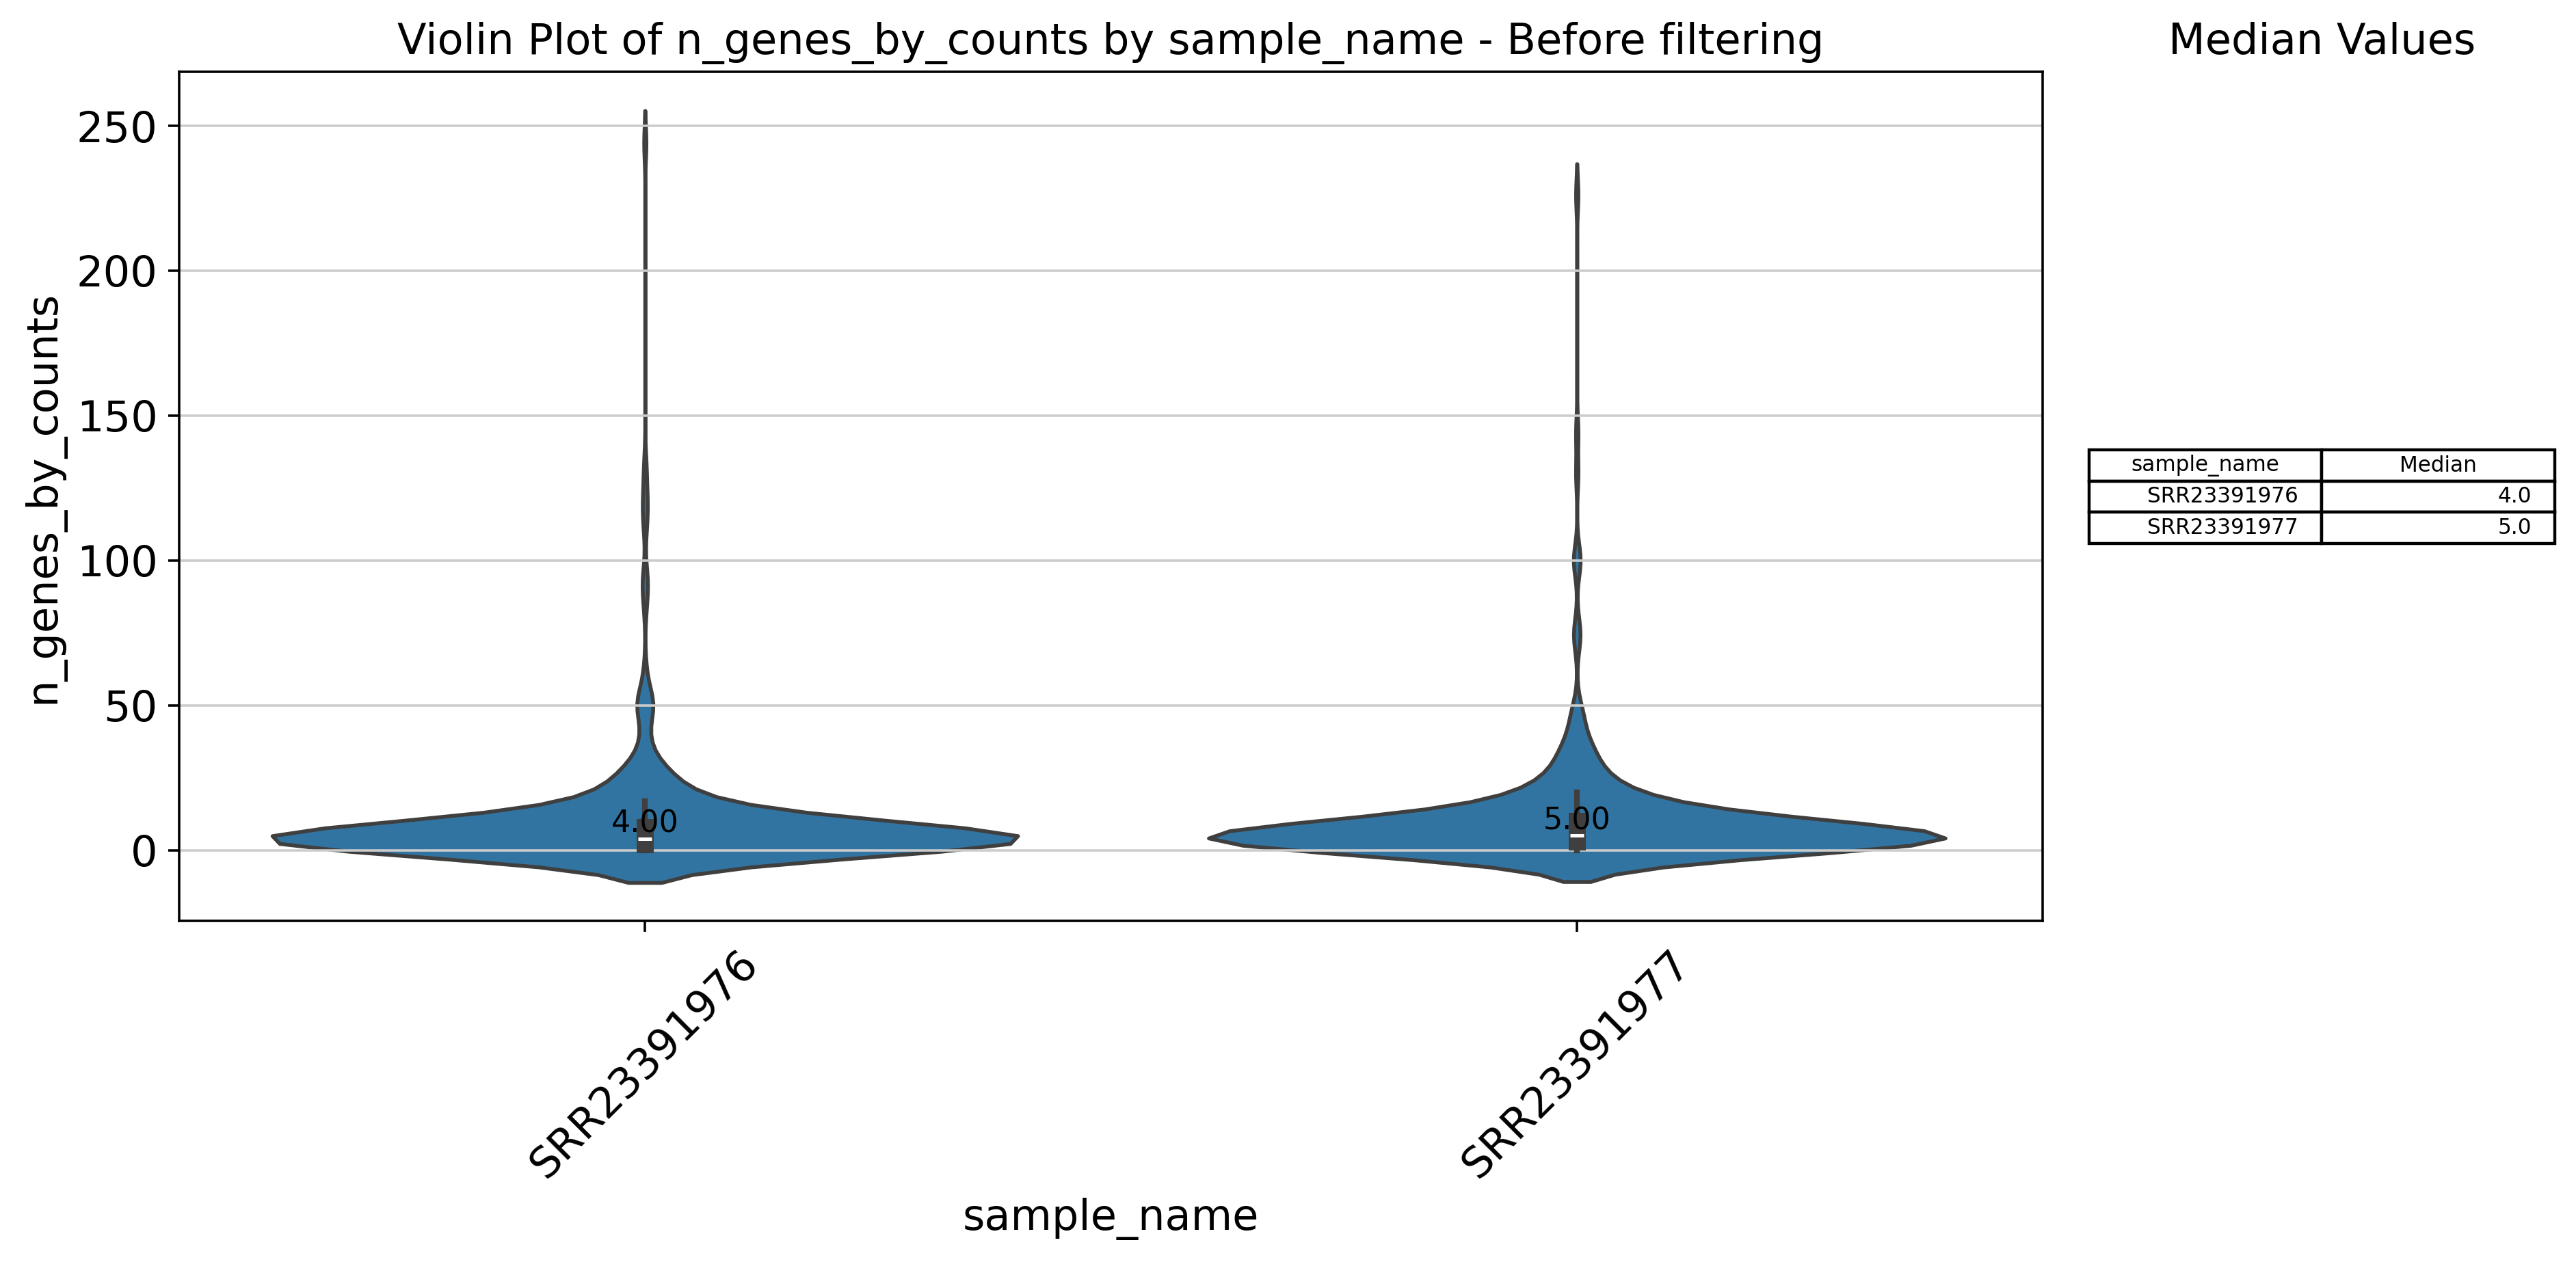

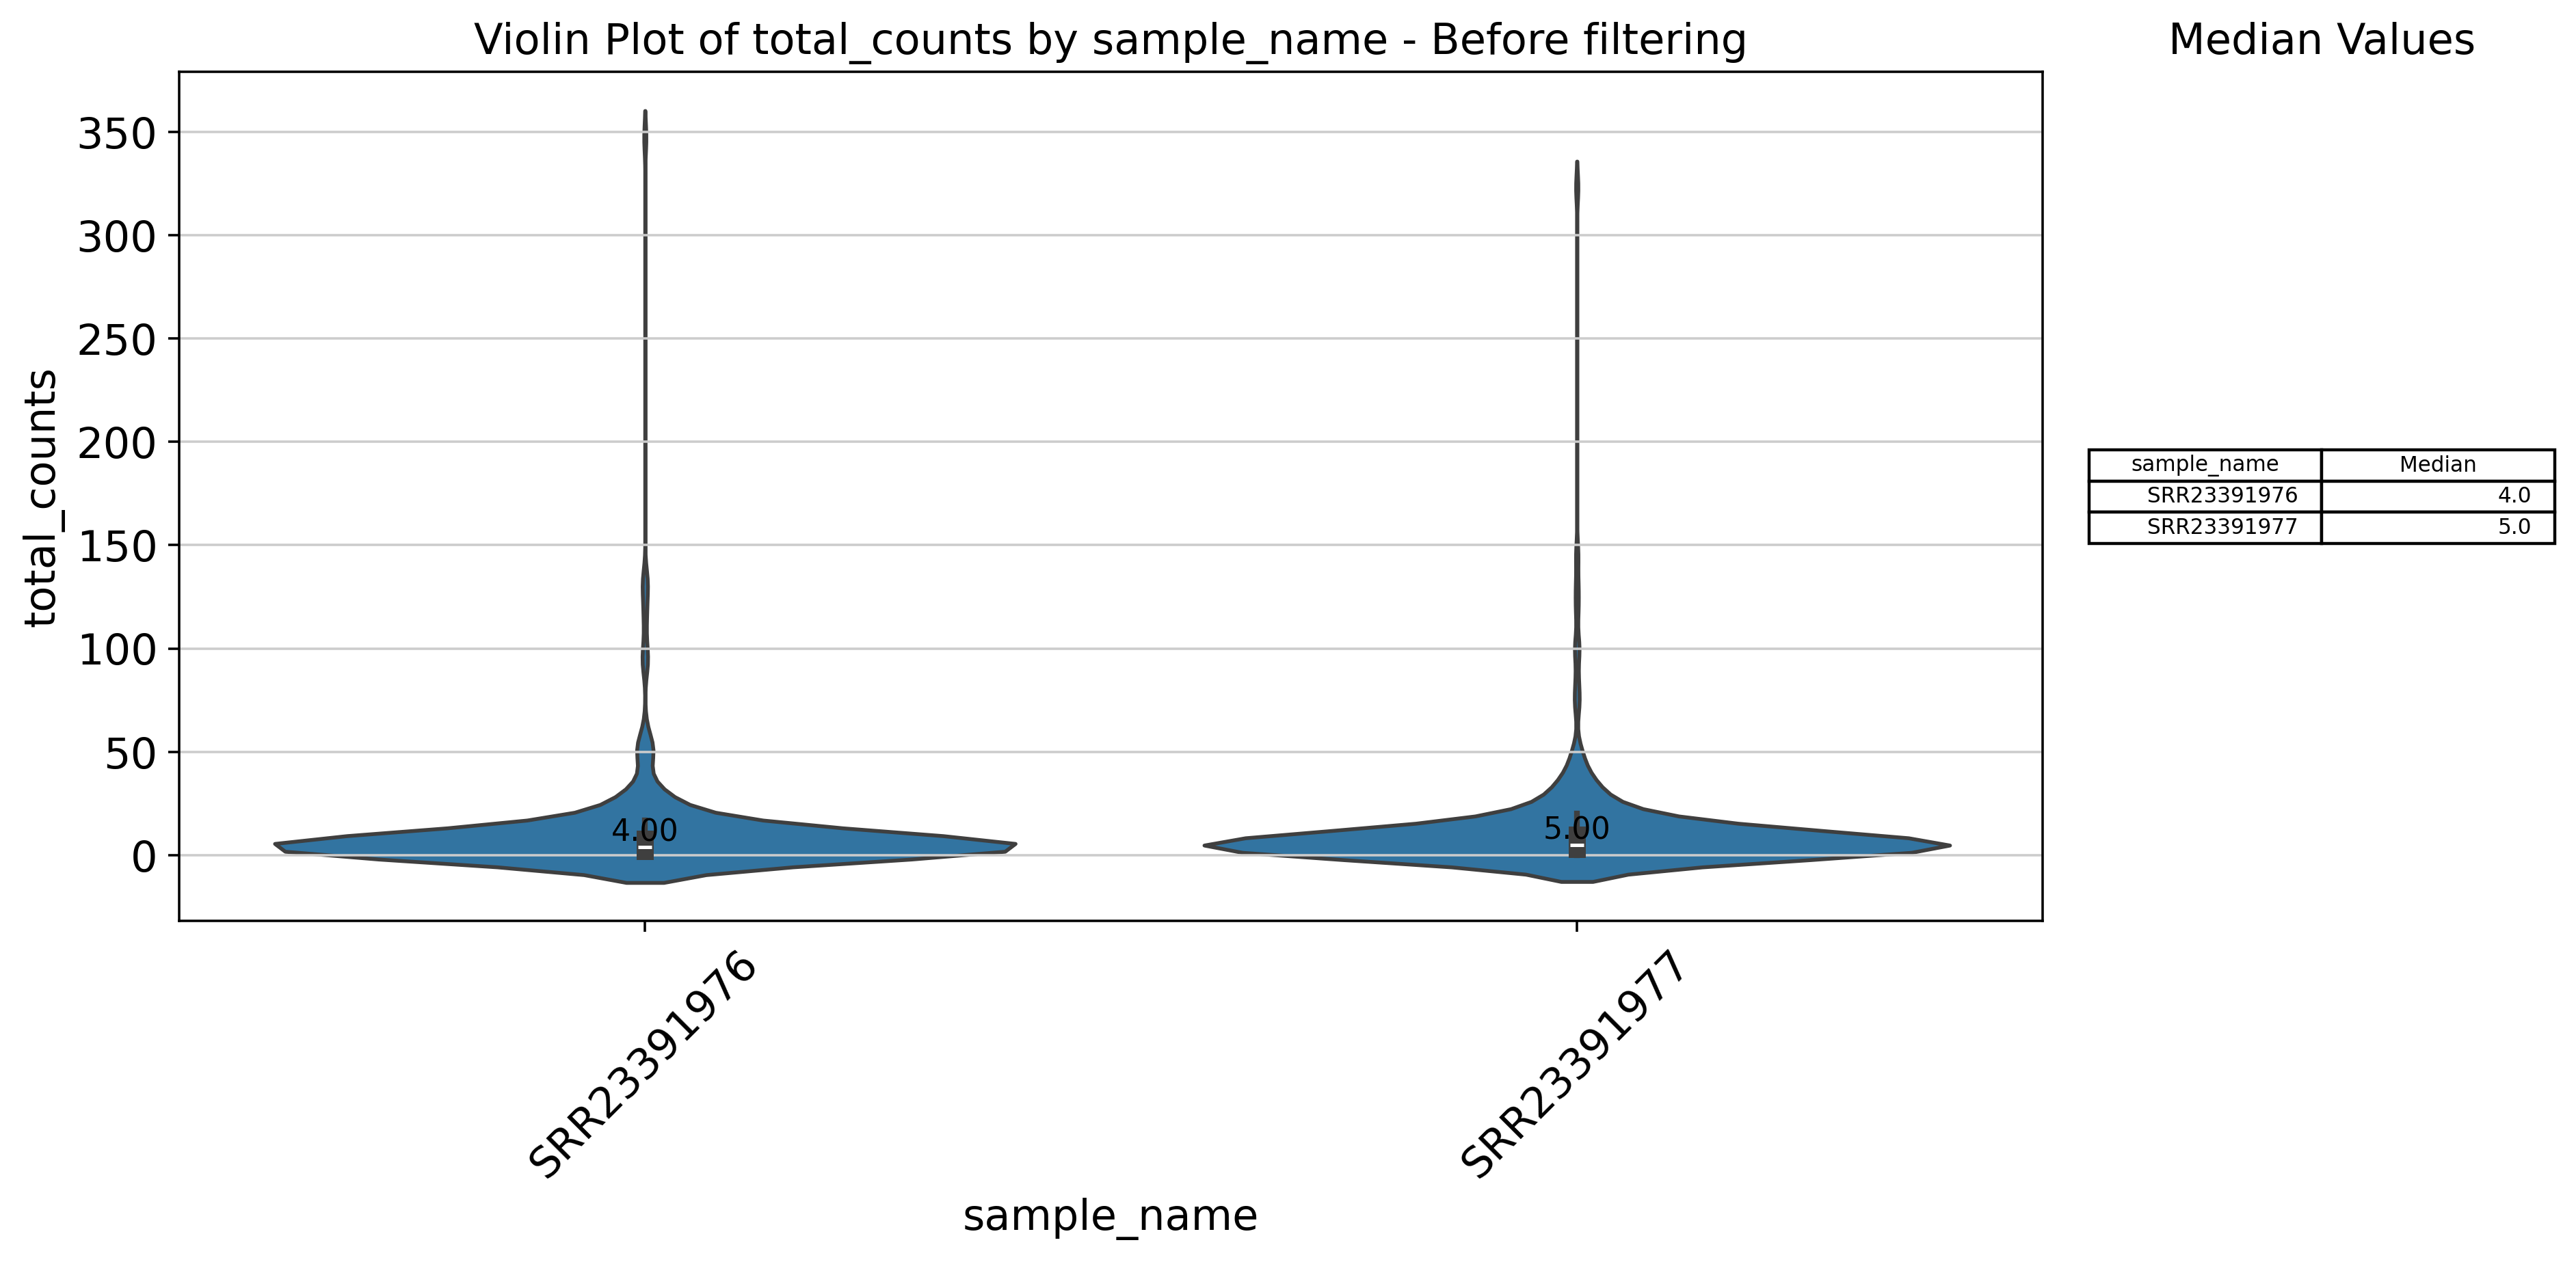

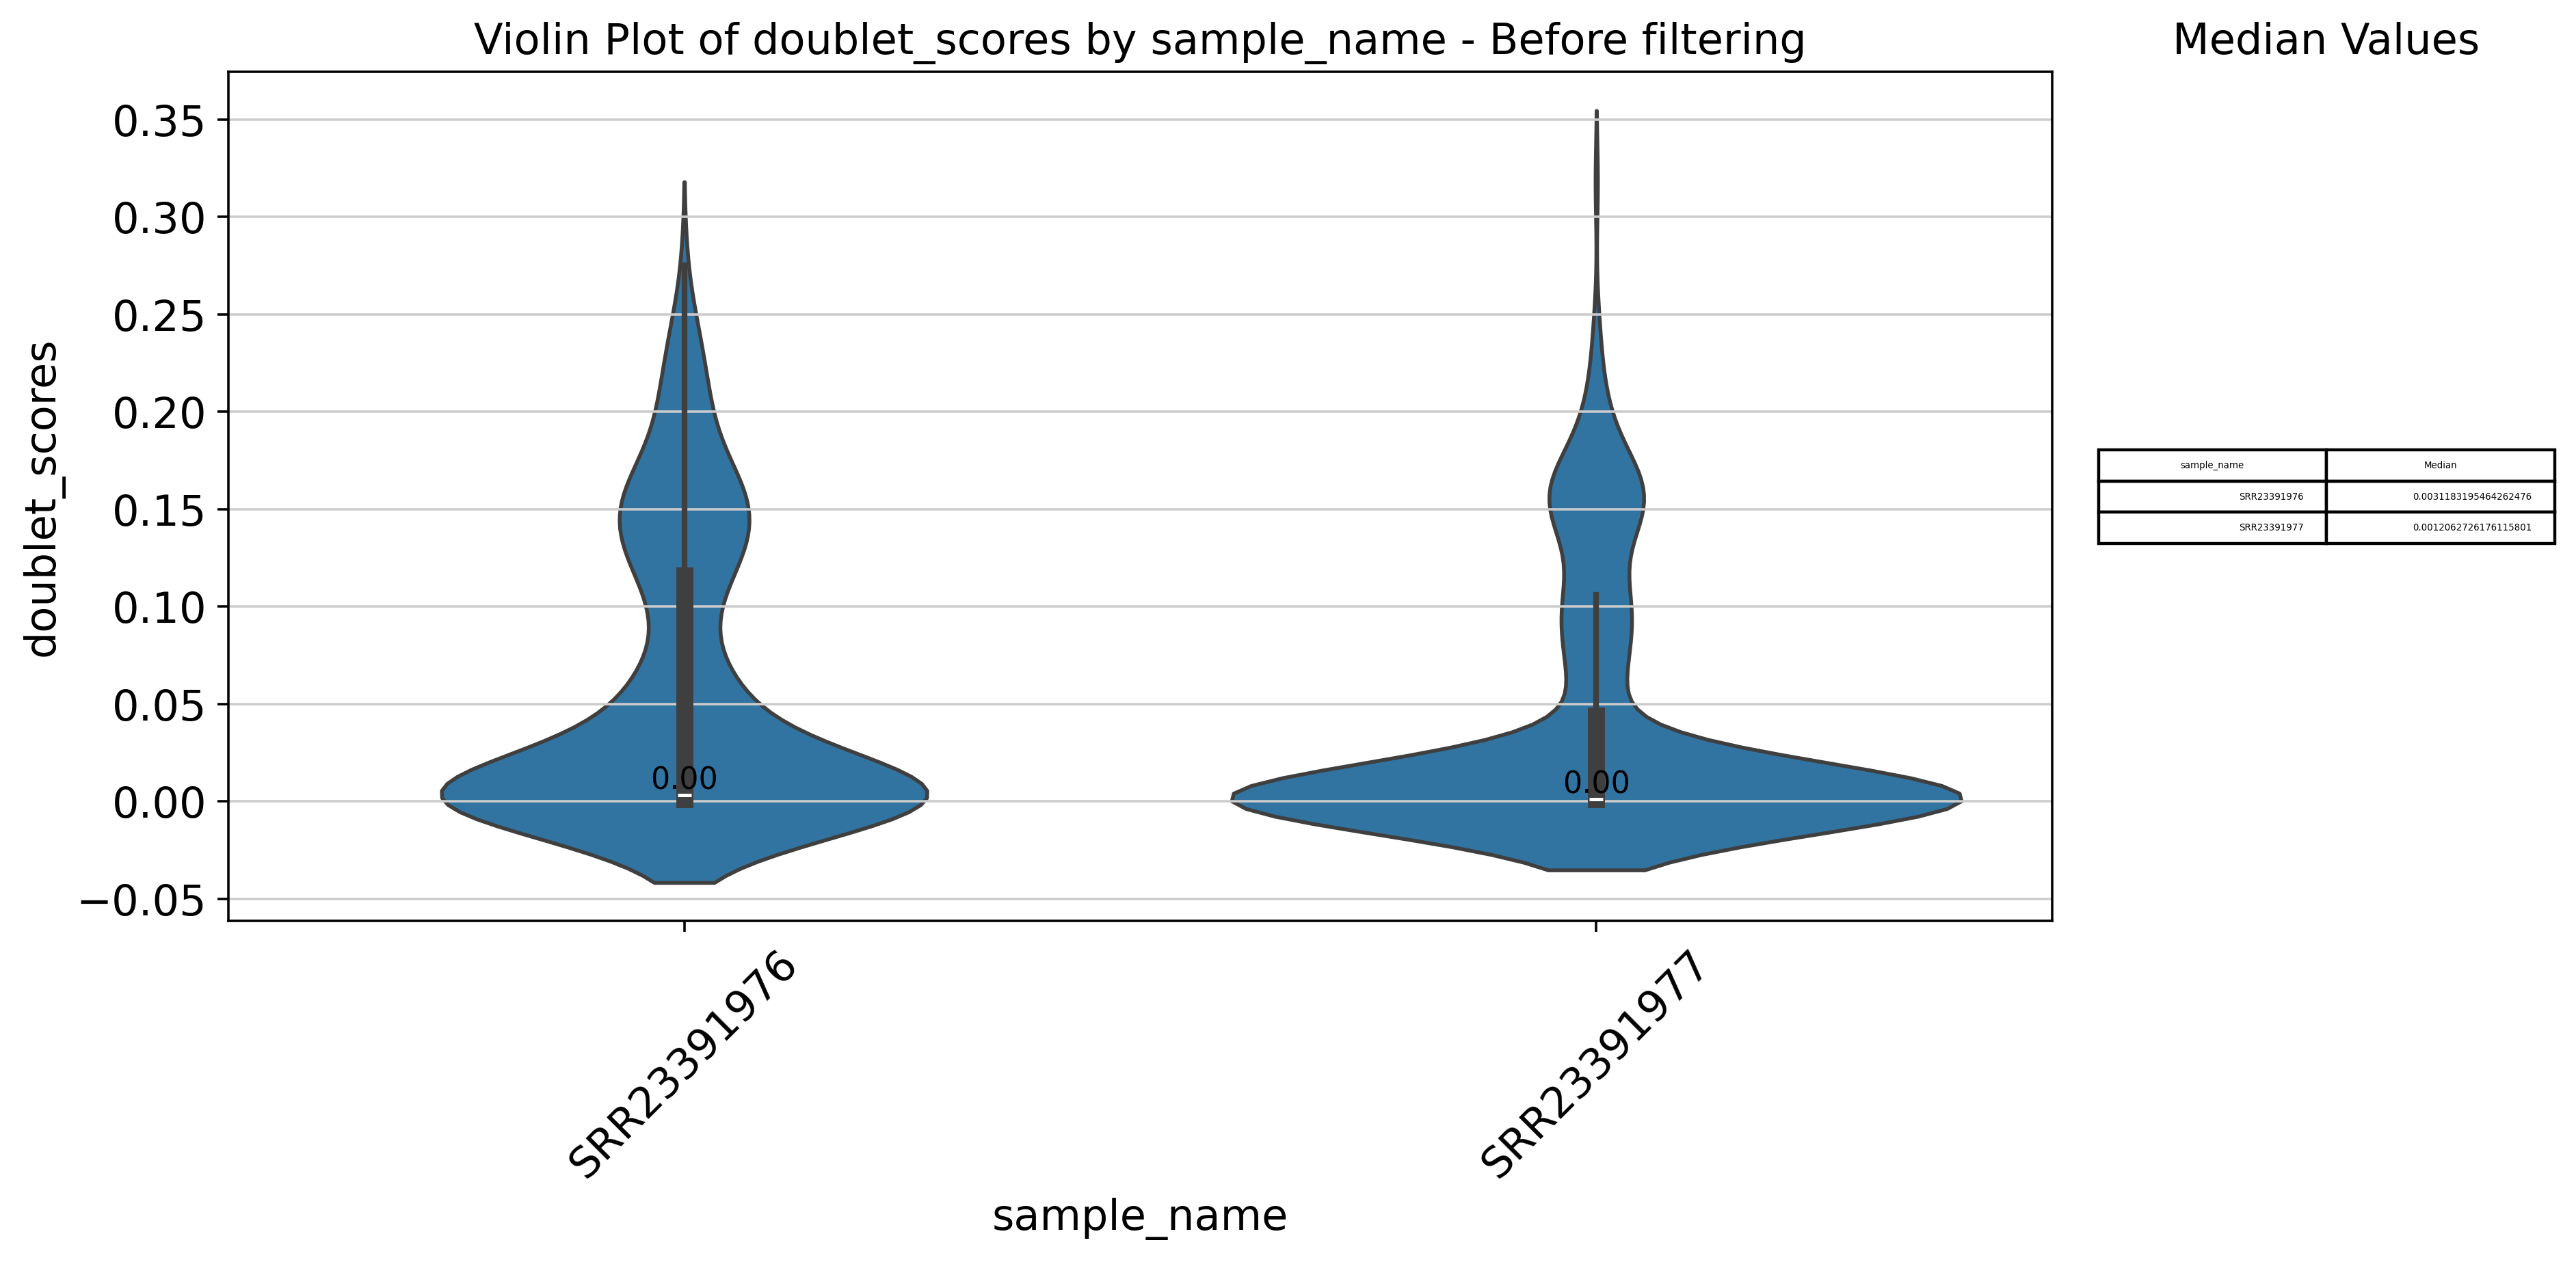

In [39]:
variables = 'n_genes_by_counts', 'total_counts', 'doublet_scores'

for var in variables:

    fig, ax = plt.subplots(figsize=(12, 6), ncols=2, gridspec_kw={'width_ratios': [4, 1]})

    sb.violinplot(data=sample_name_object.obs,x = 'sample_name' , y=var, ax=ax[0])
   
    medians = sample_name_object.obs.groupby('sample_name')[var].median()

    for sample_name, median in medians.items():
        ax[0].text(sample_name, median, f'{median:.2f}', ha='center', va='bottom', color='black', fontsize=10)
    
    ax[0].set_title(f'Violin Plot of {var} by sample_name - Before filtering')
    ax[0].set_xlabel('sample_name')
    ax[0].set_ylabel(var)
    ax[0].tick_params(axis='x', rotation=45)

    median_df = pd.DataFrame({'sample_name': medians.index, 'Median': medians.values})

    ax[1].axis('off')
    ax[1].table(cellText=median_df.values, colLabels=median_df.columns, loc='center')
    ax[1].set_title('Median Values')
    
    plt.tight_layout()
    plt.show()


### Visualization of qc metrics

Text(0.5, 1.0, 'Mt and Ribo percentages - Before filtering')

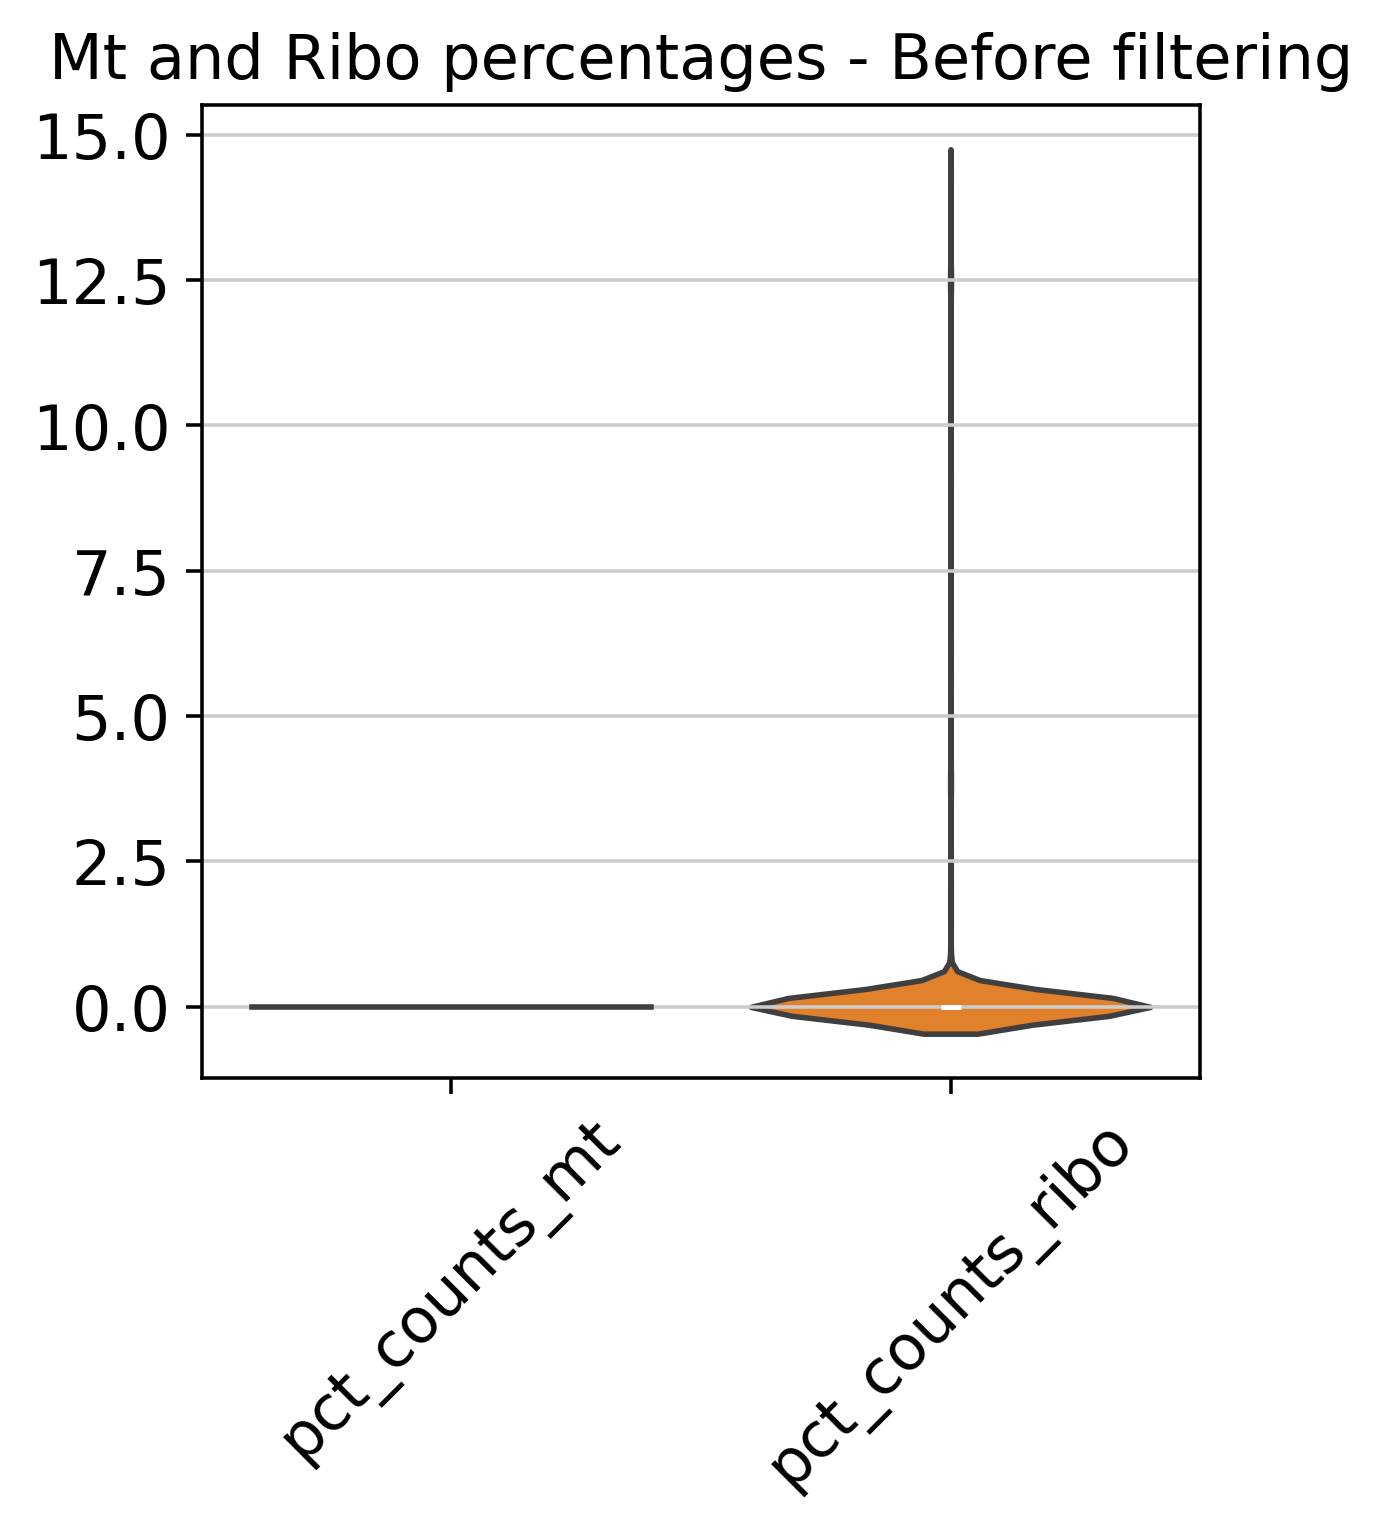

In [40]:
variables = ['pct_counts_mt', 'pct_counts_ribo']

sb.violinplot(data=sample_name_object.obs[variables])
plt.xticks(rotation=45)
plt.title(f'Mt and Ribo percentages - Before filtering')

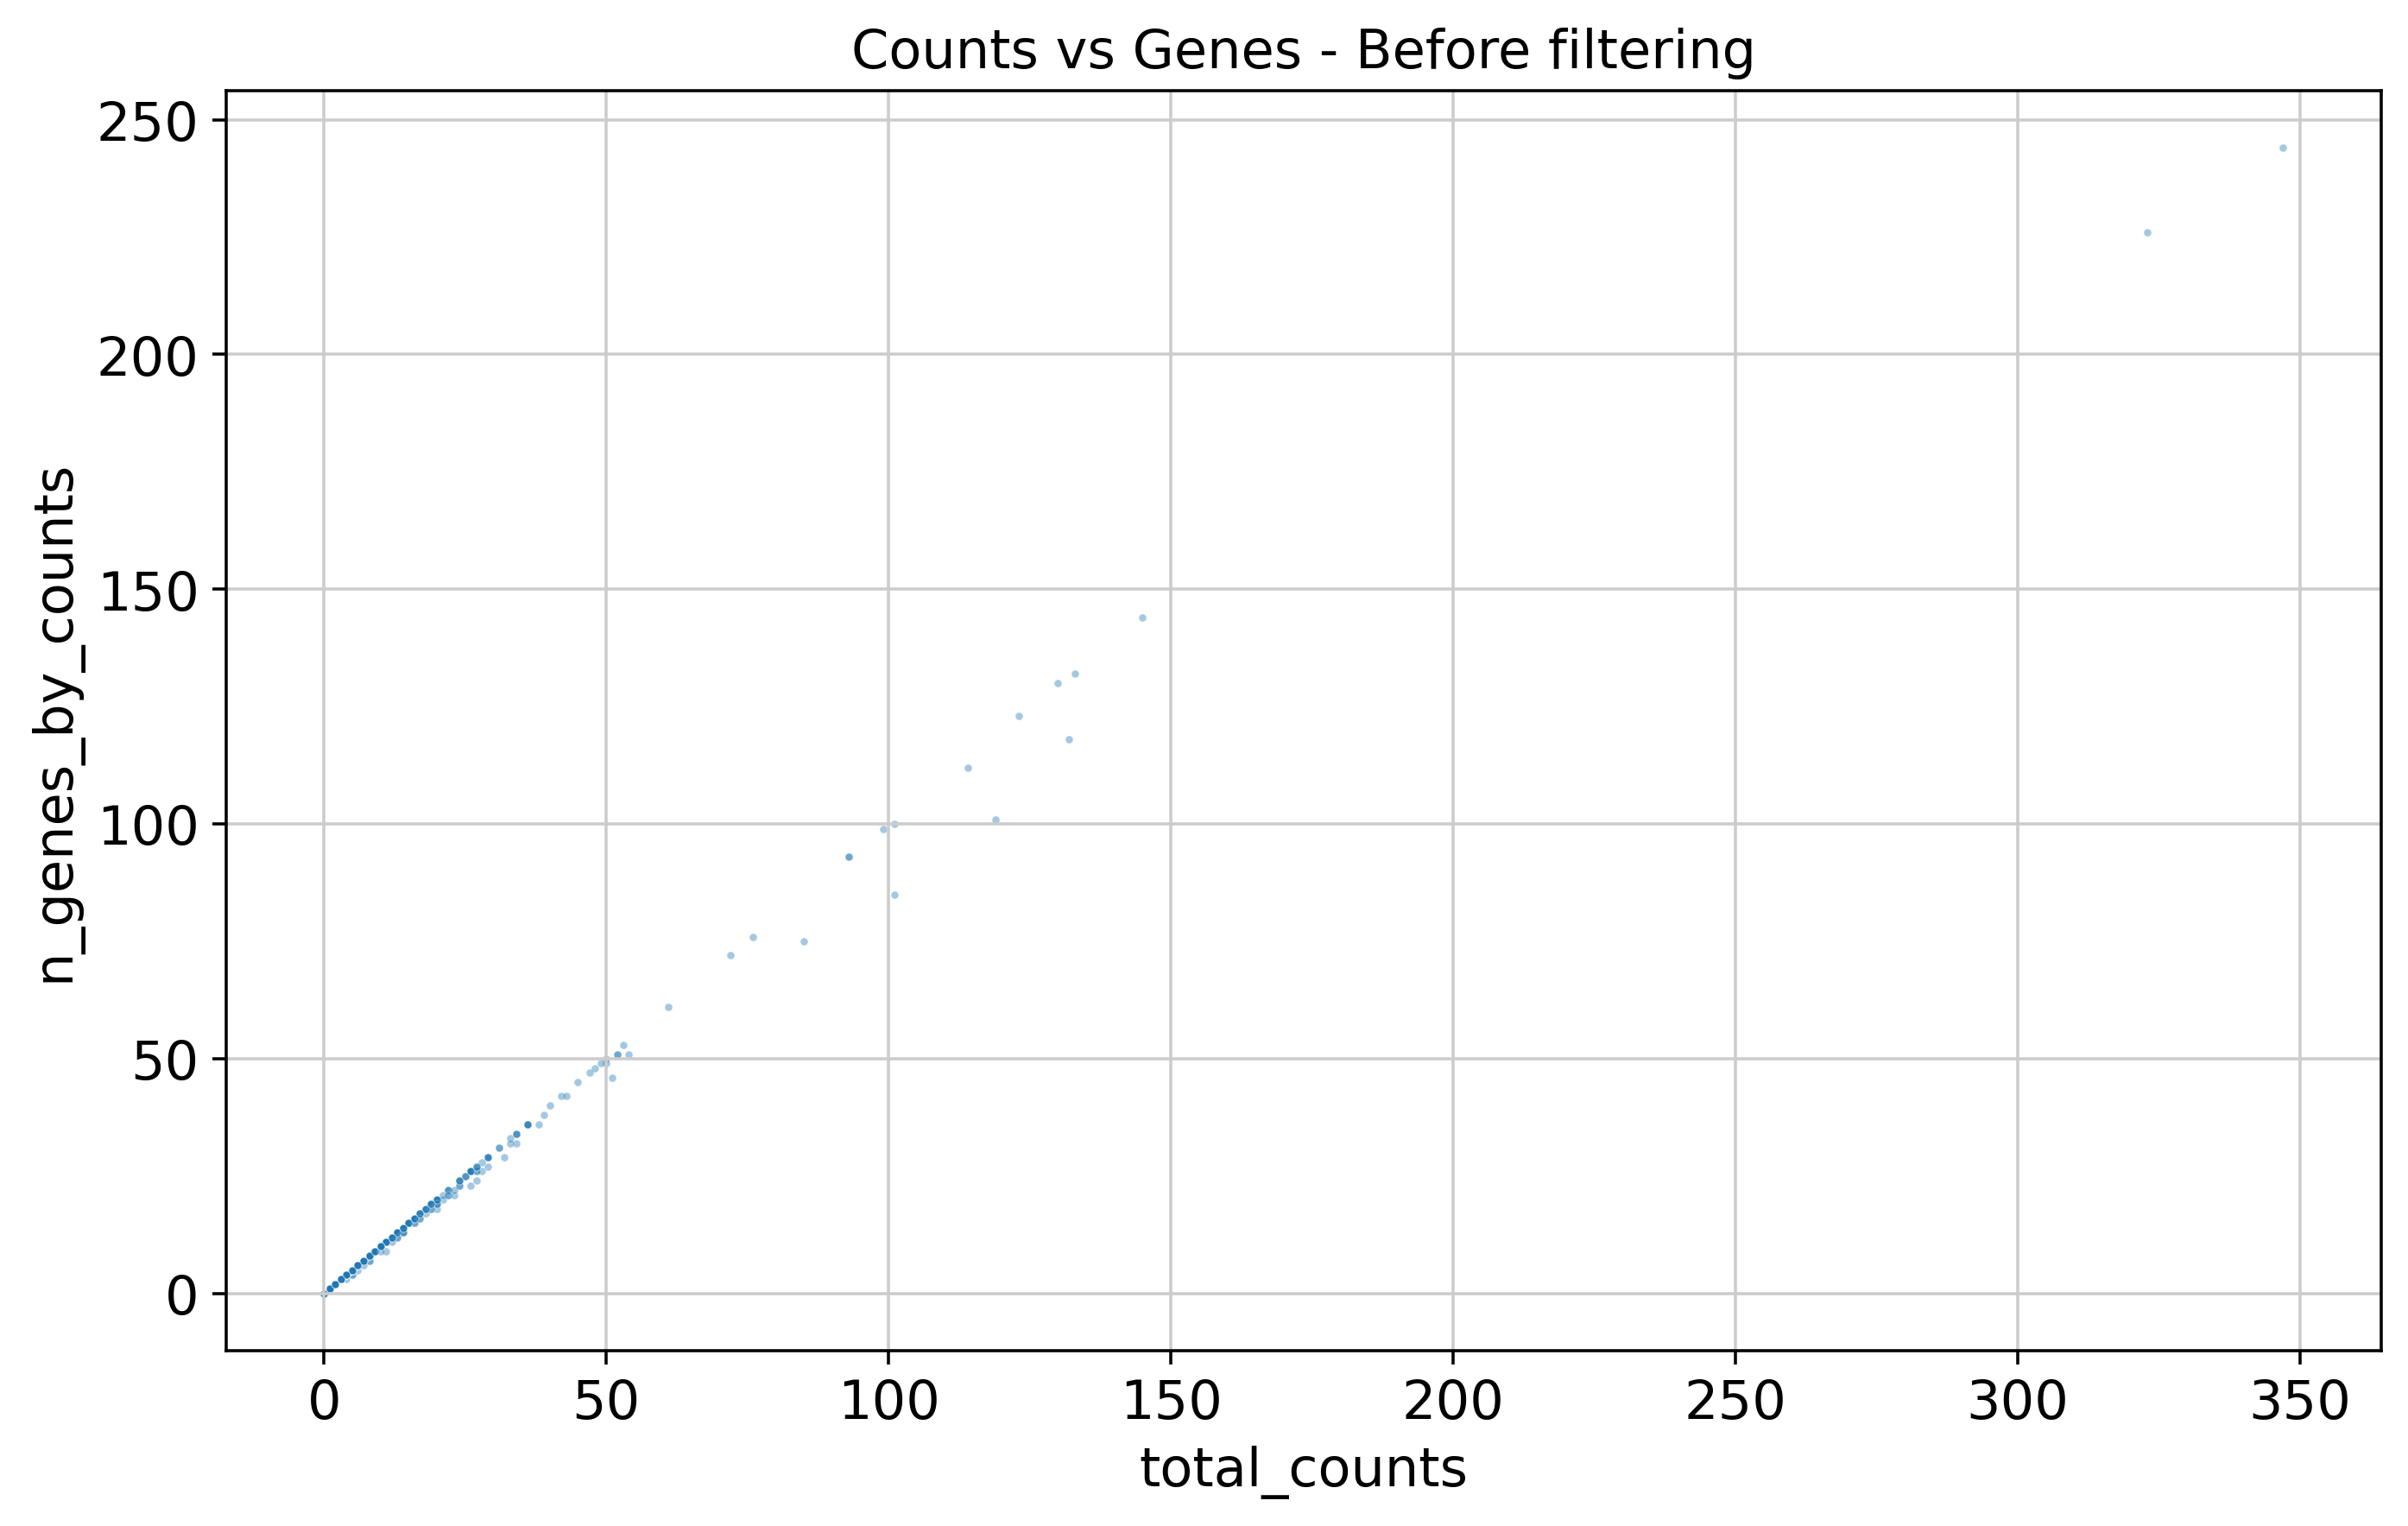

In [41]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=sample_name_object.obs, x='total_counts', y='n_genes_by_counts' , alpha = 0.4, s=4)
#plt.xticks(range(0, int(max(sample_name_object.obs['total_counts'])) + 1, 3000),rotation=45, fontsize = 10)
#plt.yticks(range(0, int(max(sample_name_object.obs['n_genes_by_counts'])) + 1, 1000),fontsize = 10)
plt.title(f'Counts vs Genes - Before filtering')
plt.show()

### Filtering based on QC metrics

In [42]:
filtered_object = sample_name_object[sample_name_object.obs['n_genes_by_counts'] > 10]
filtered_object = filtered_object[filtered_object.obs['n_genes_by_counts'] < 150]

filtered_object = filtered_object[filtered_object.obs['total_counts'] > 10]
filtered_object = filtered_object[filtered_object.obs['total_counts'] < 150]

filtered_object = filtered_object[filtered_object.obs['pct_counts_mt'] < 60]
filtered_object = filtered_object[filtered_object.obs['pct_counts_ribo'] < 20]

filtered_object = filtered_object[filtered_object.obs['doublet_scores'] < 0.35]

filtered_object

View of AnnData object with n_obs × n_vars = 194 × 602
    obs: 'sample_name', 'n_counts', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'percent_chrY'
    var: 'ensembl', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'chromosome'

Text(0.5, 1.0, 'Mt and Ribo percentages - After filtering')

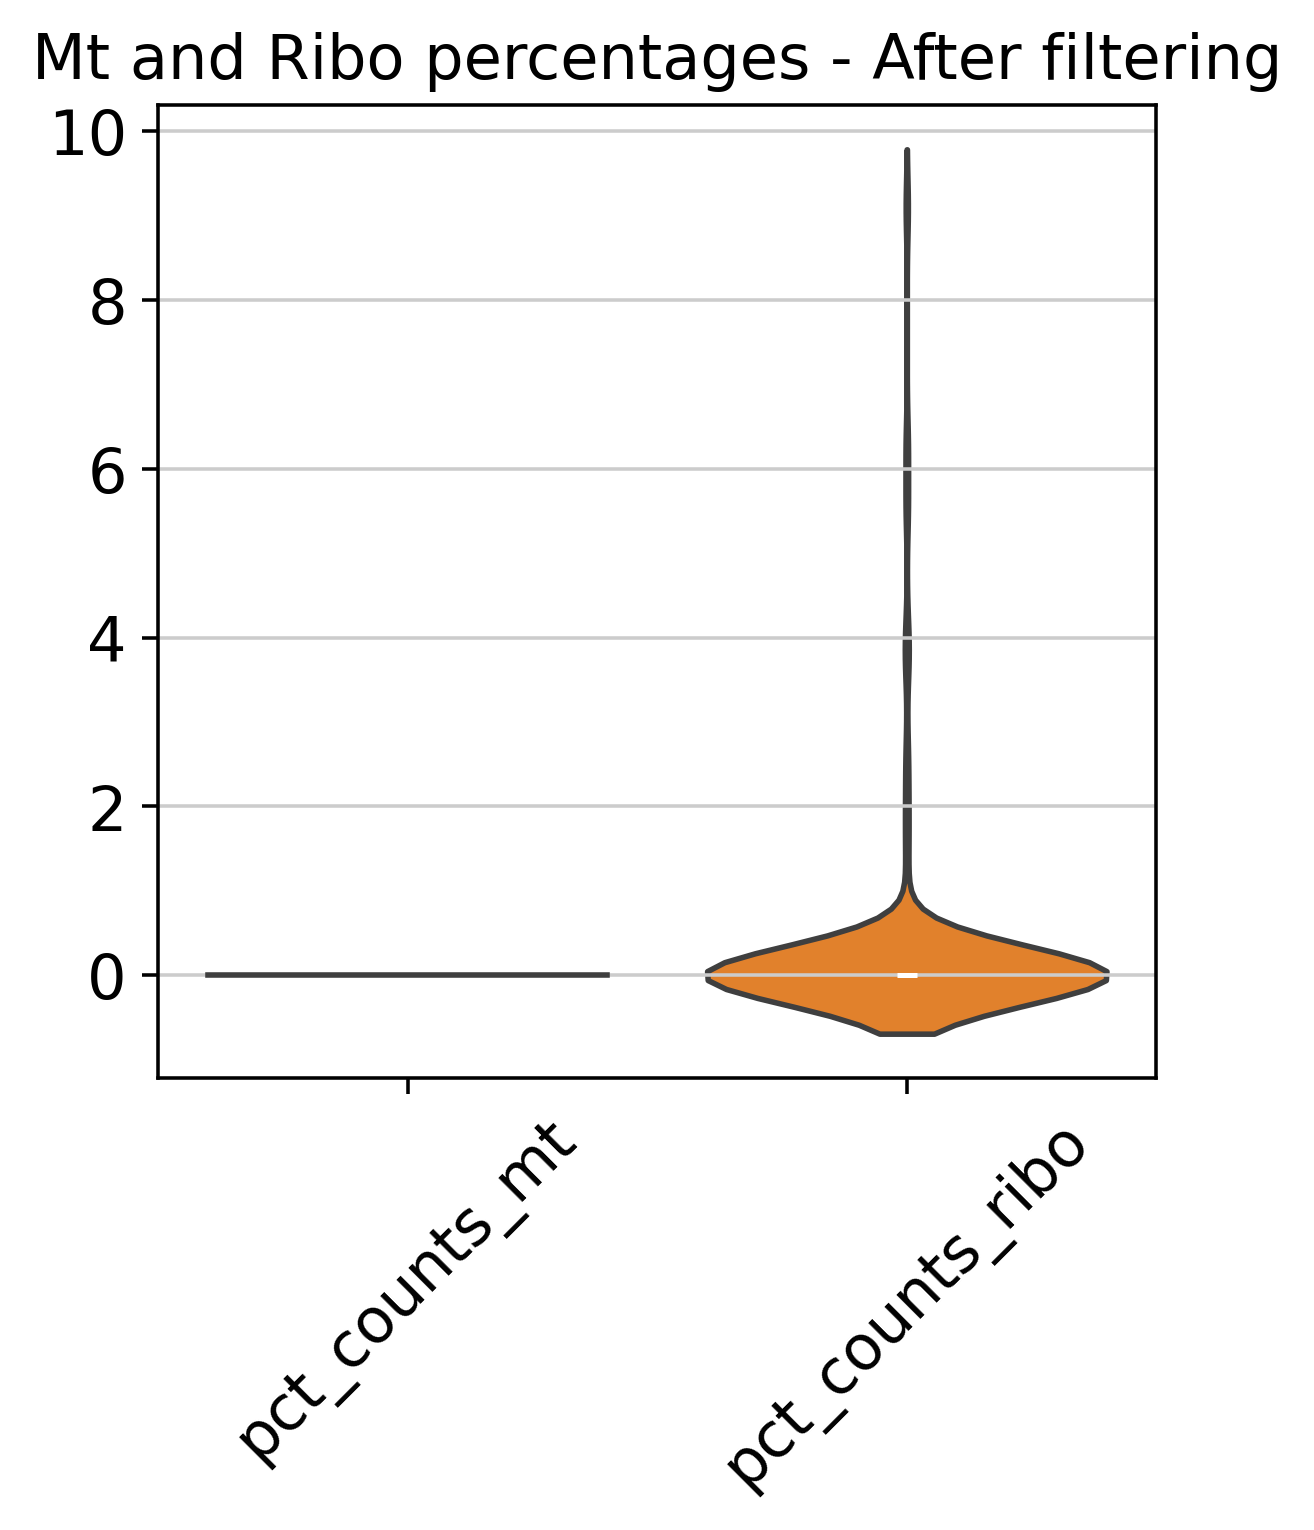

In [43]:
variables = ['pct_counts_mt', 'pct_counts_ribo']

sb.violinplot(data=filtered_object.obs[variables])
plt.xticks(rotation=45)
plt.title(f'Mt and Ribo percentages - After filtering')

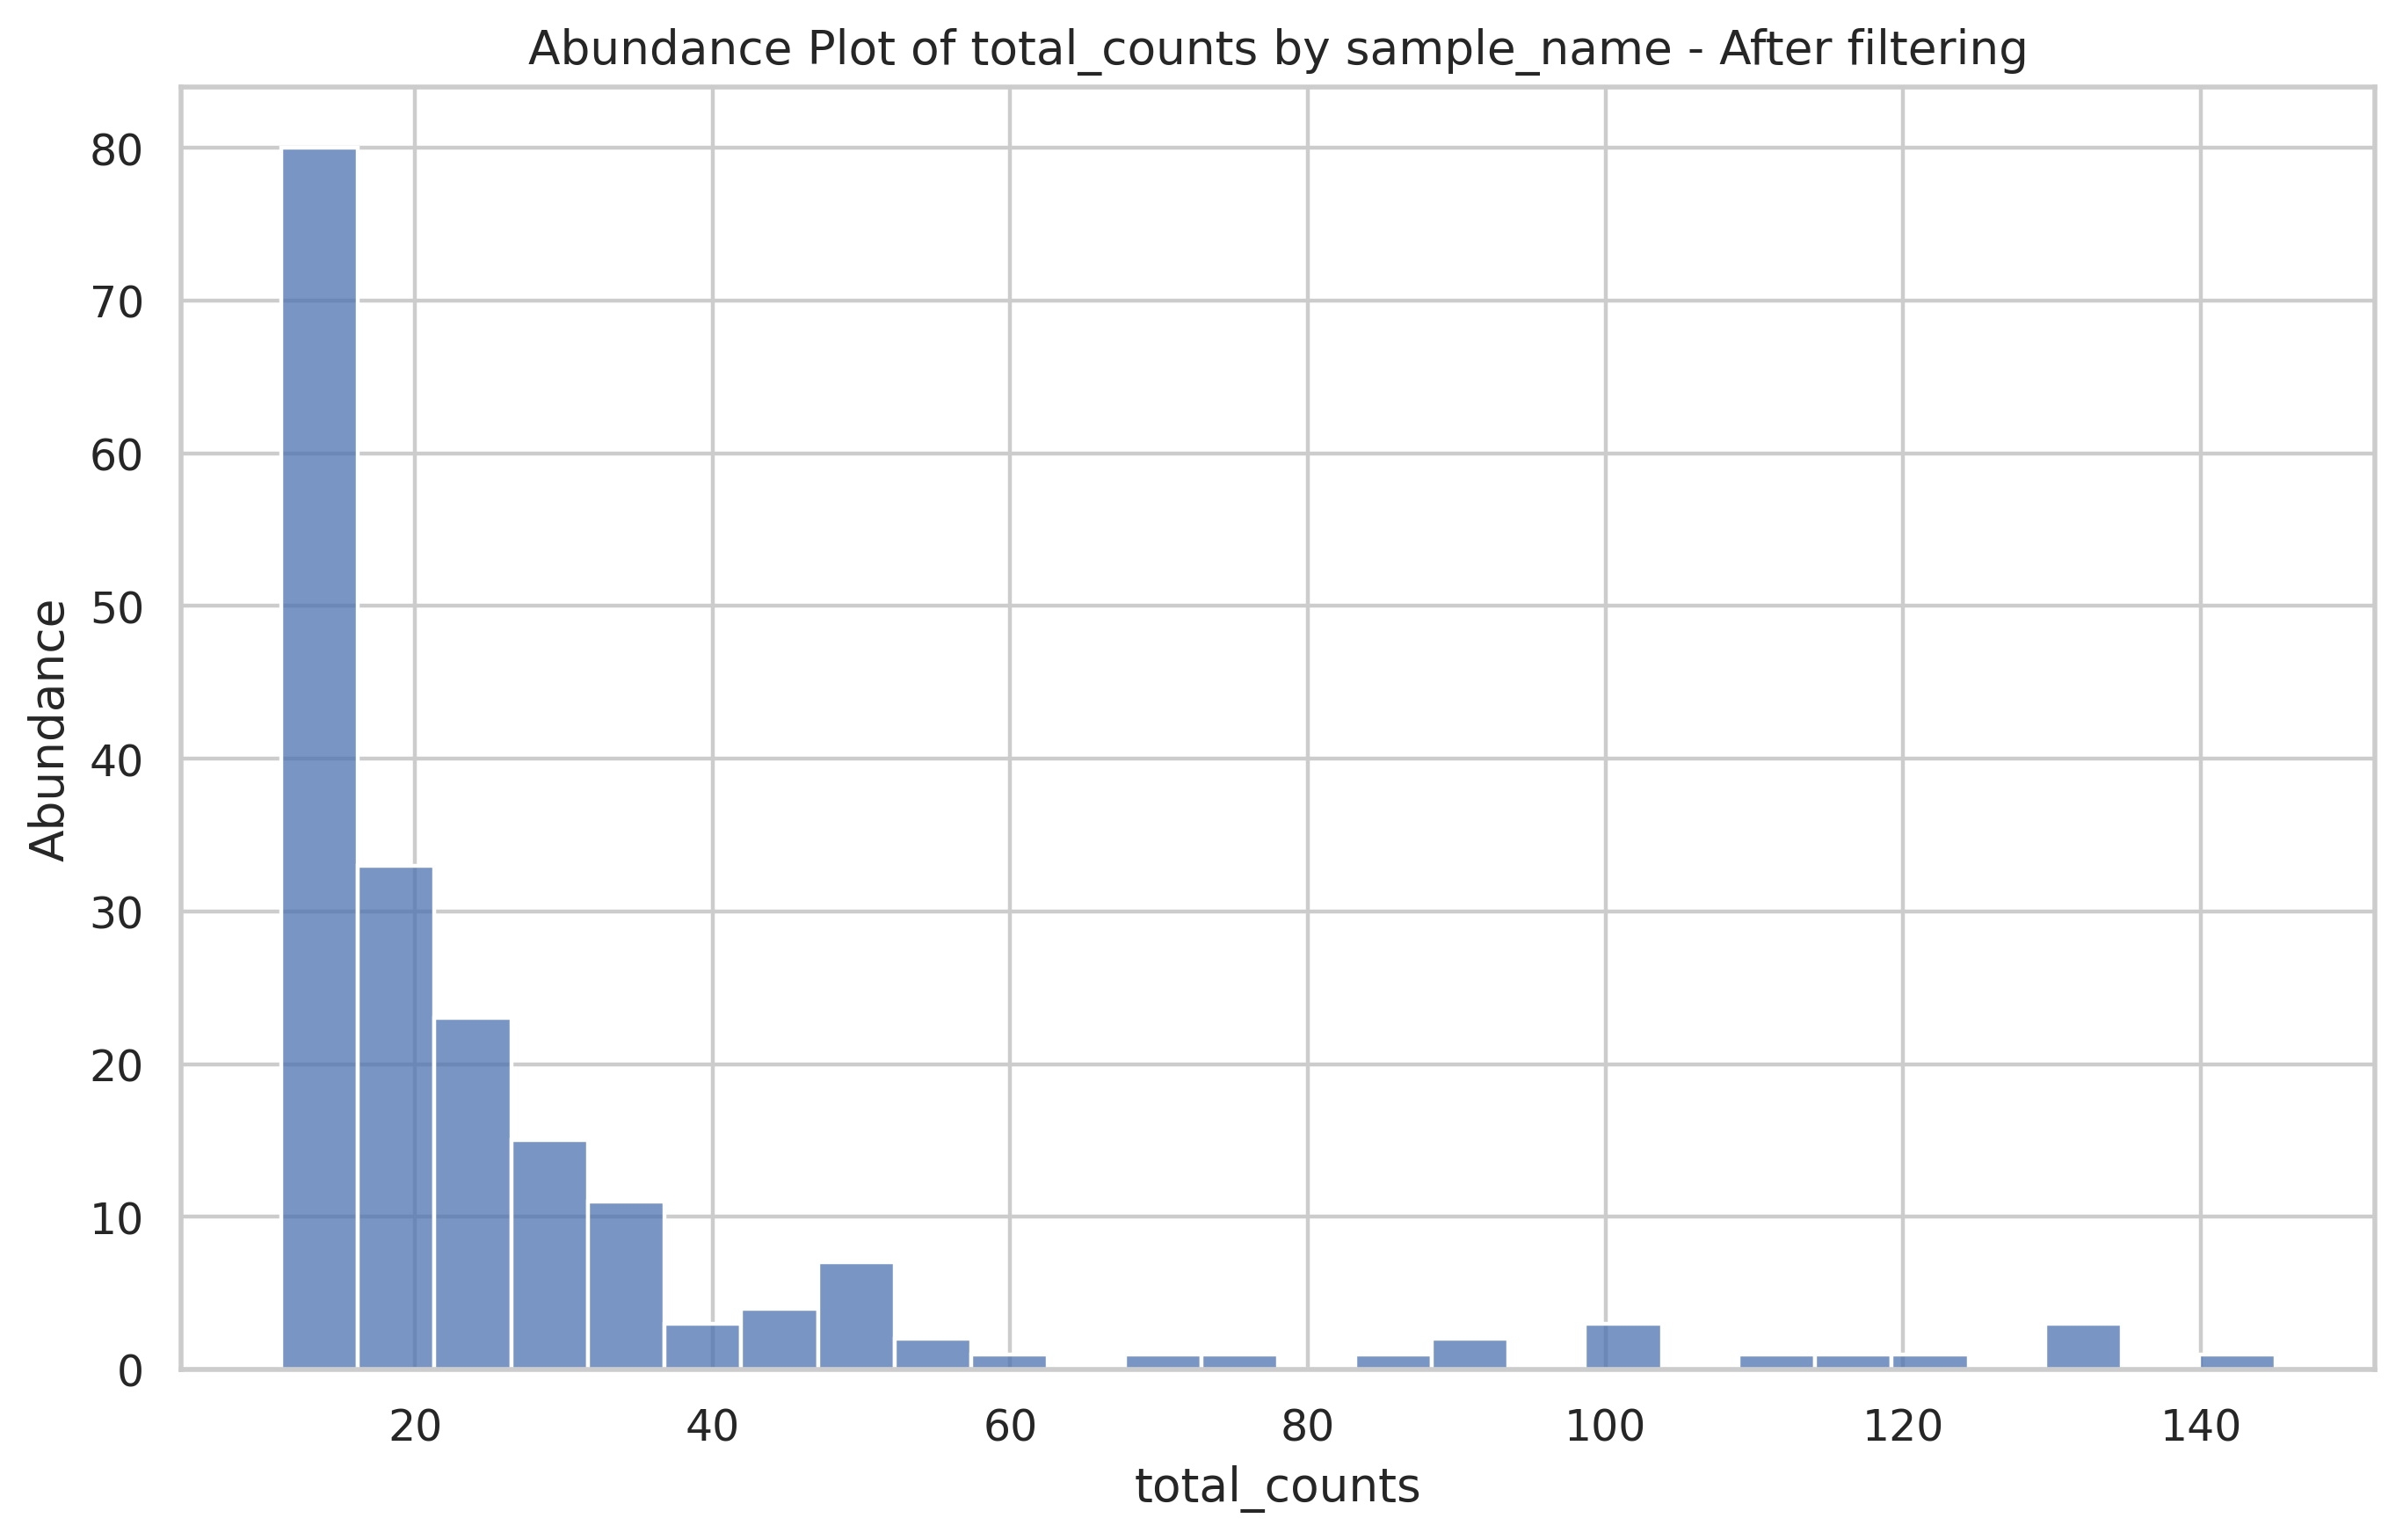

In [44]:
sb.set(style = "whitegrid")
covariate_to_visualize = 'total_counts'

plt.figure(figsize = (10, 6))
sb.histplot(data = filtered_object.obs, x = covariate_to_visualize, stat = 'count', common_norm = False)
plt.xlabel(covariate_to_visualize)
plt.ylabel('Abundance')
plt.title(f'Abundance Plot of {covariate_to_visualize} by sample_name - After filtering')
plt.show()

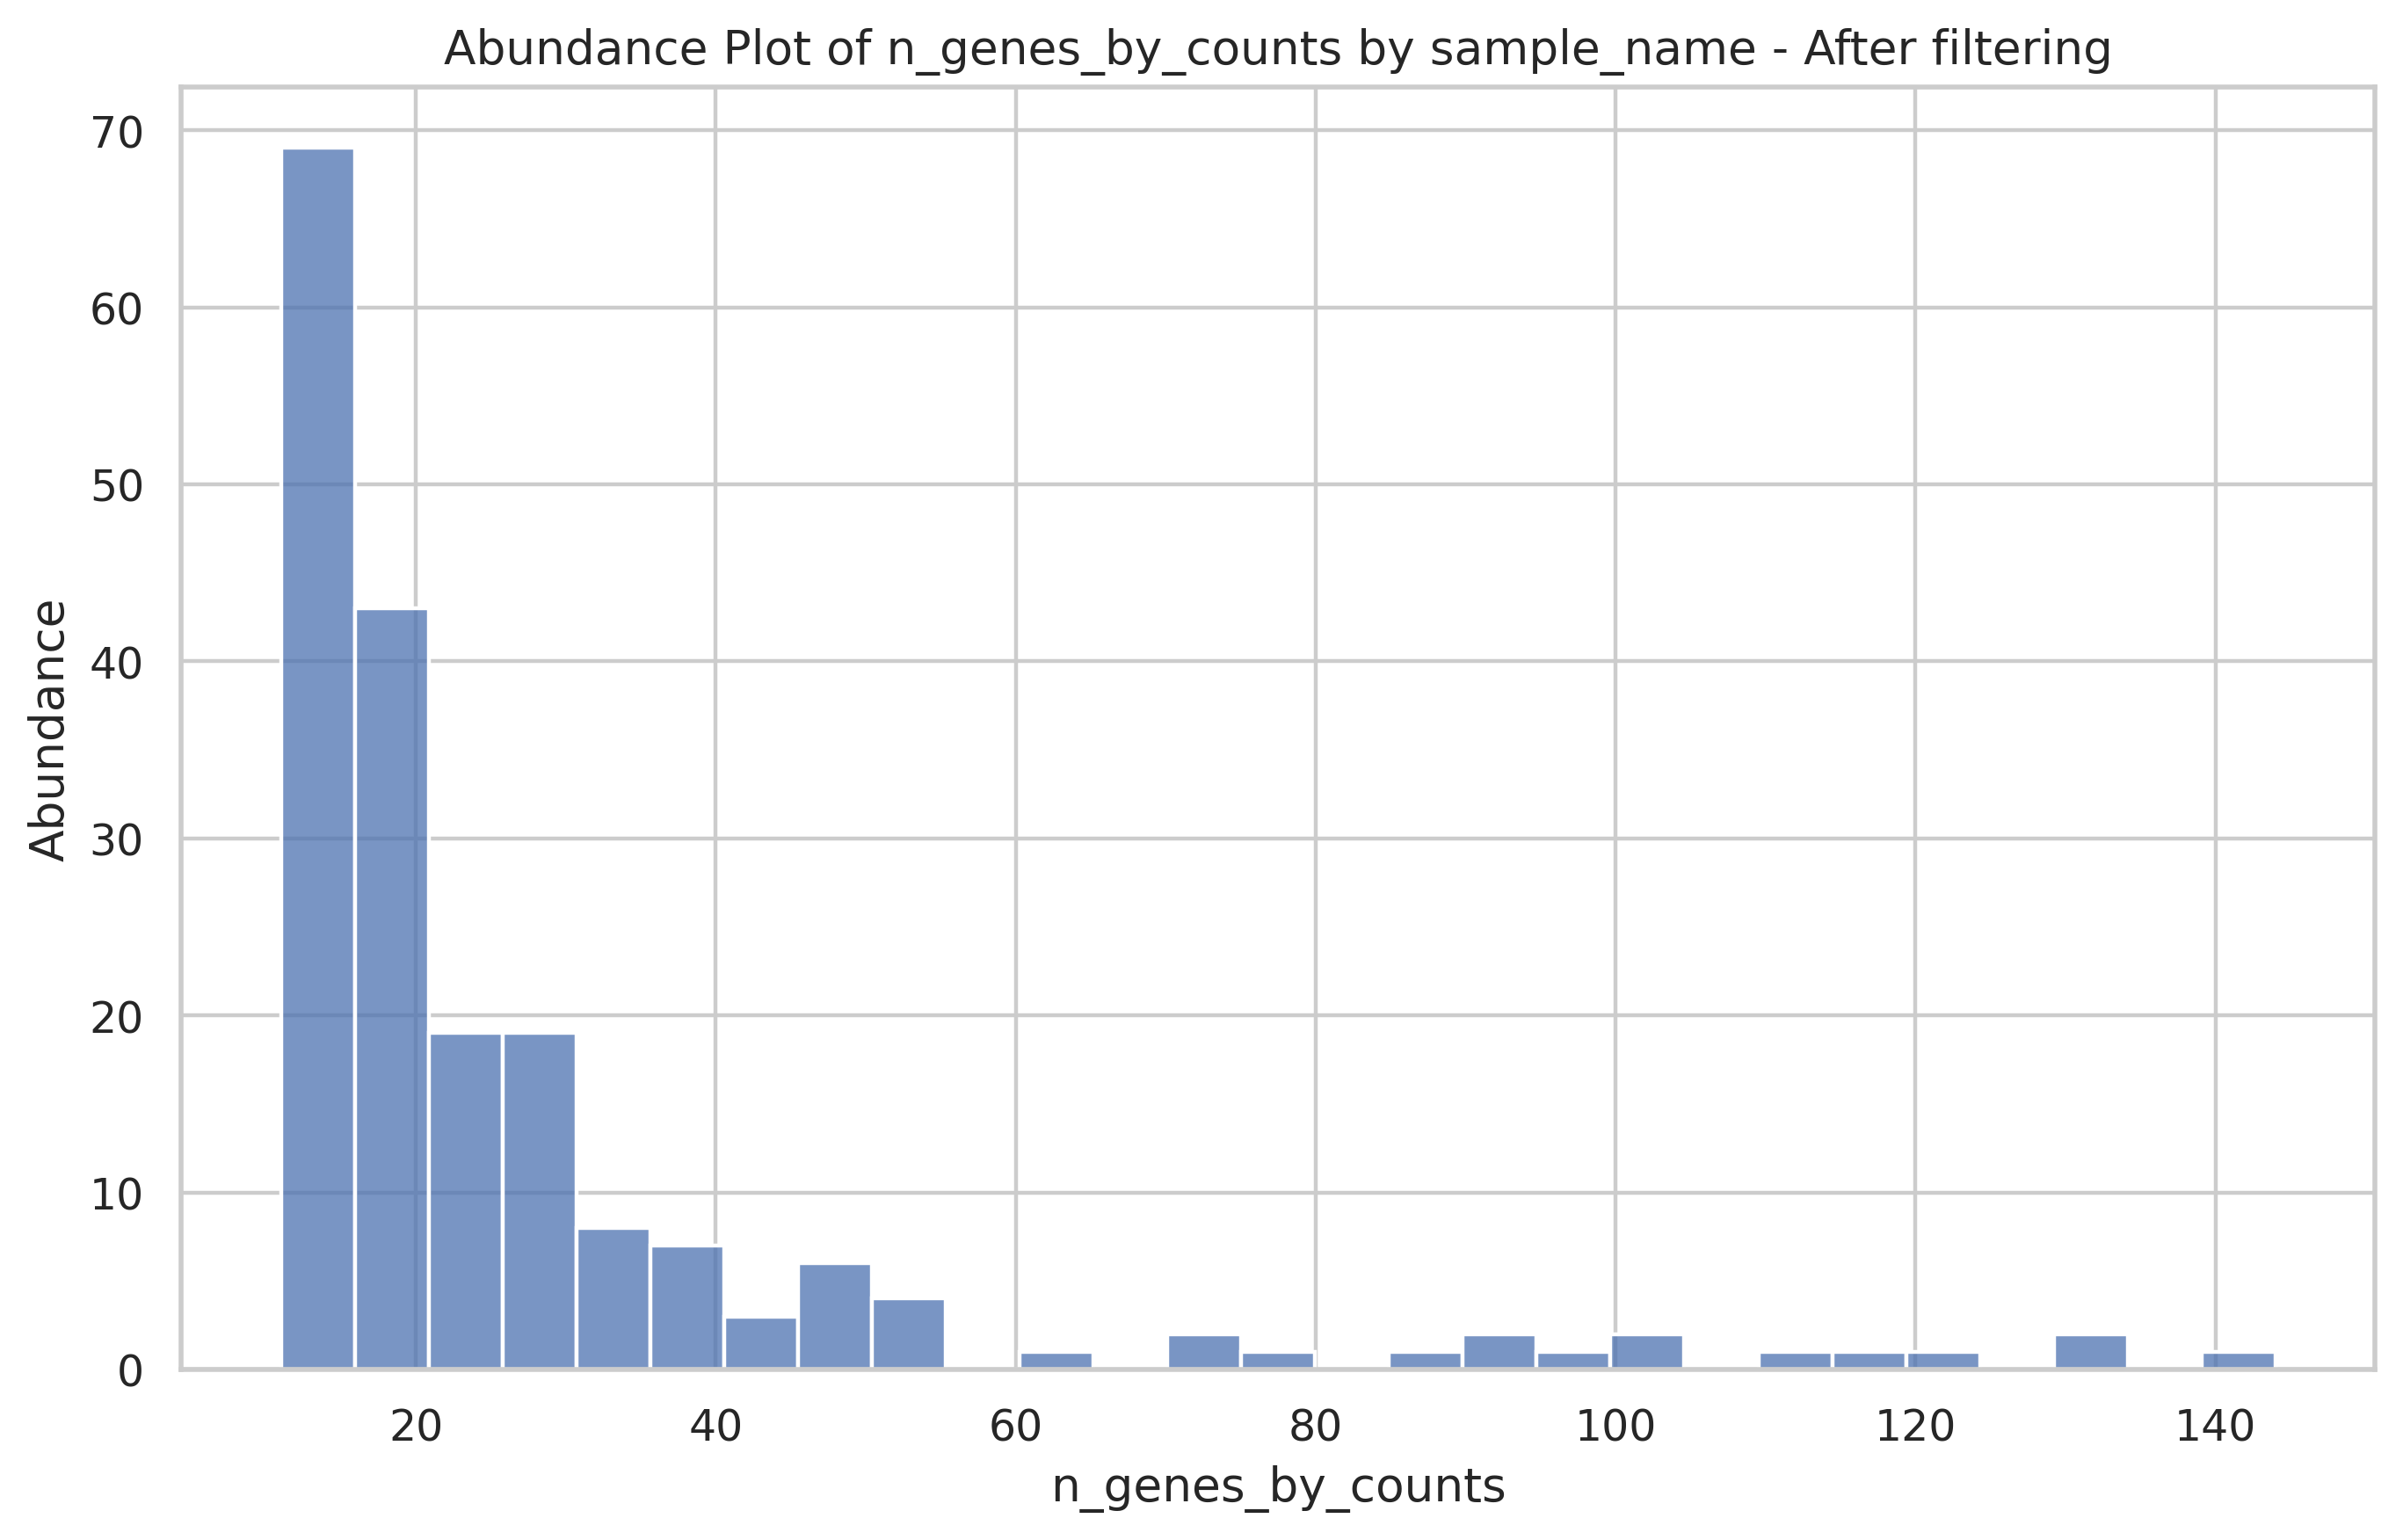

In [45]:
sb.set(style = "whitegrid")
covariate_to_visualize = 'n_genes_by_counts'

plt.figure(figsize = (10, 6))
sb.histplot(data = filtered_object.obs, x = covariate_to_visualize, stat = 'count', common_norm = False)
plt.xlabel(covariate_to_visualize)
plt.ylabel('Abundance')
plt.title(f'Abundance Plot of {covariate_to_visualize} by sample_name - After filtering')
plt.show()

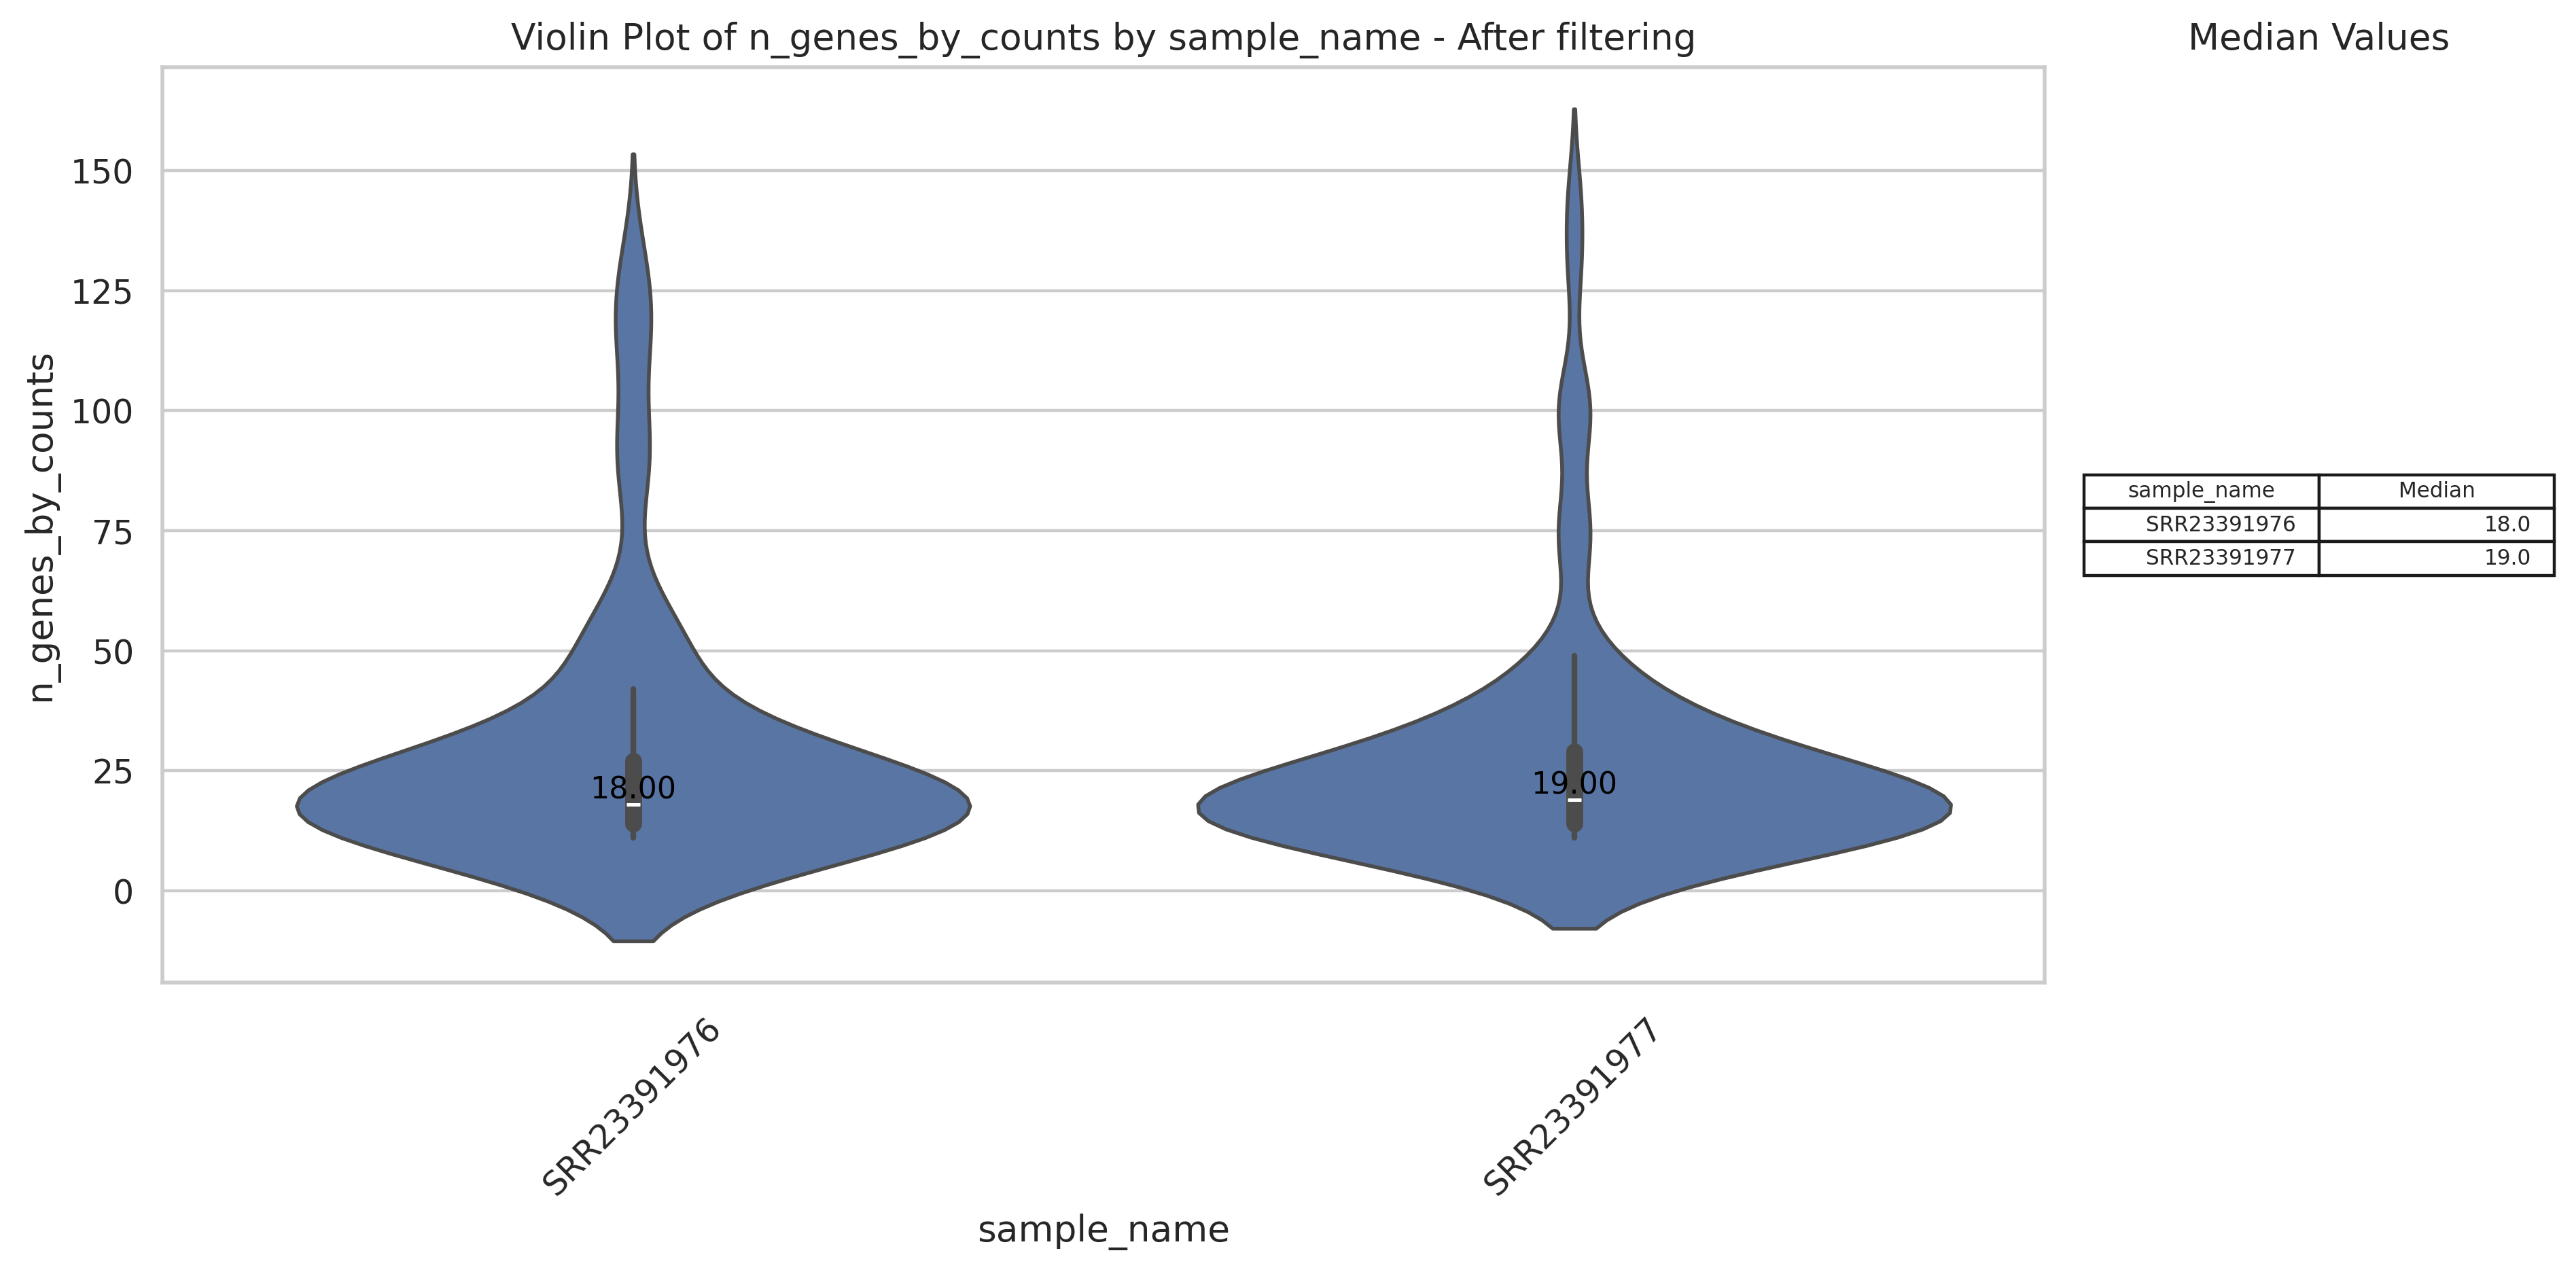

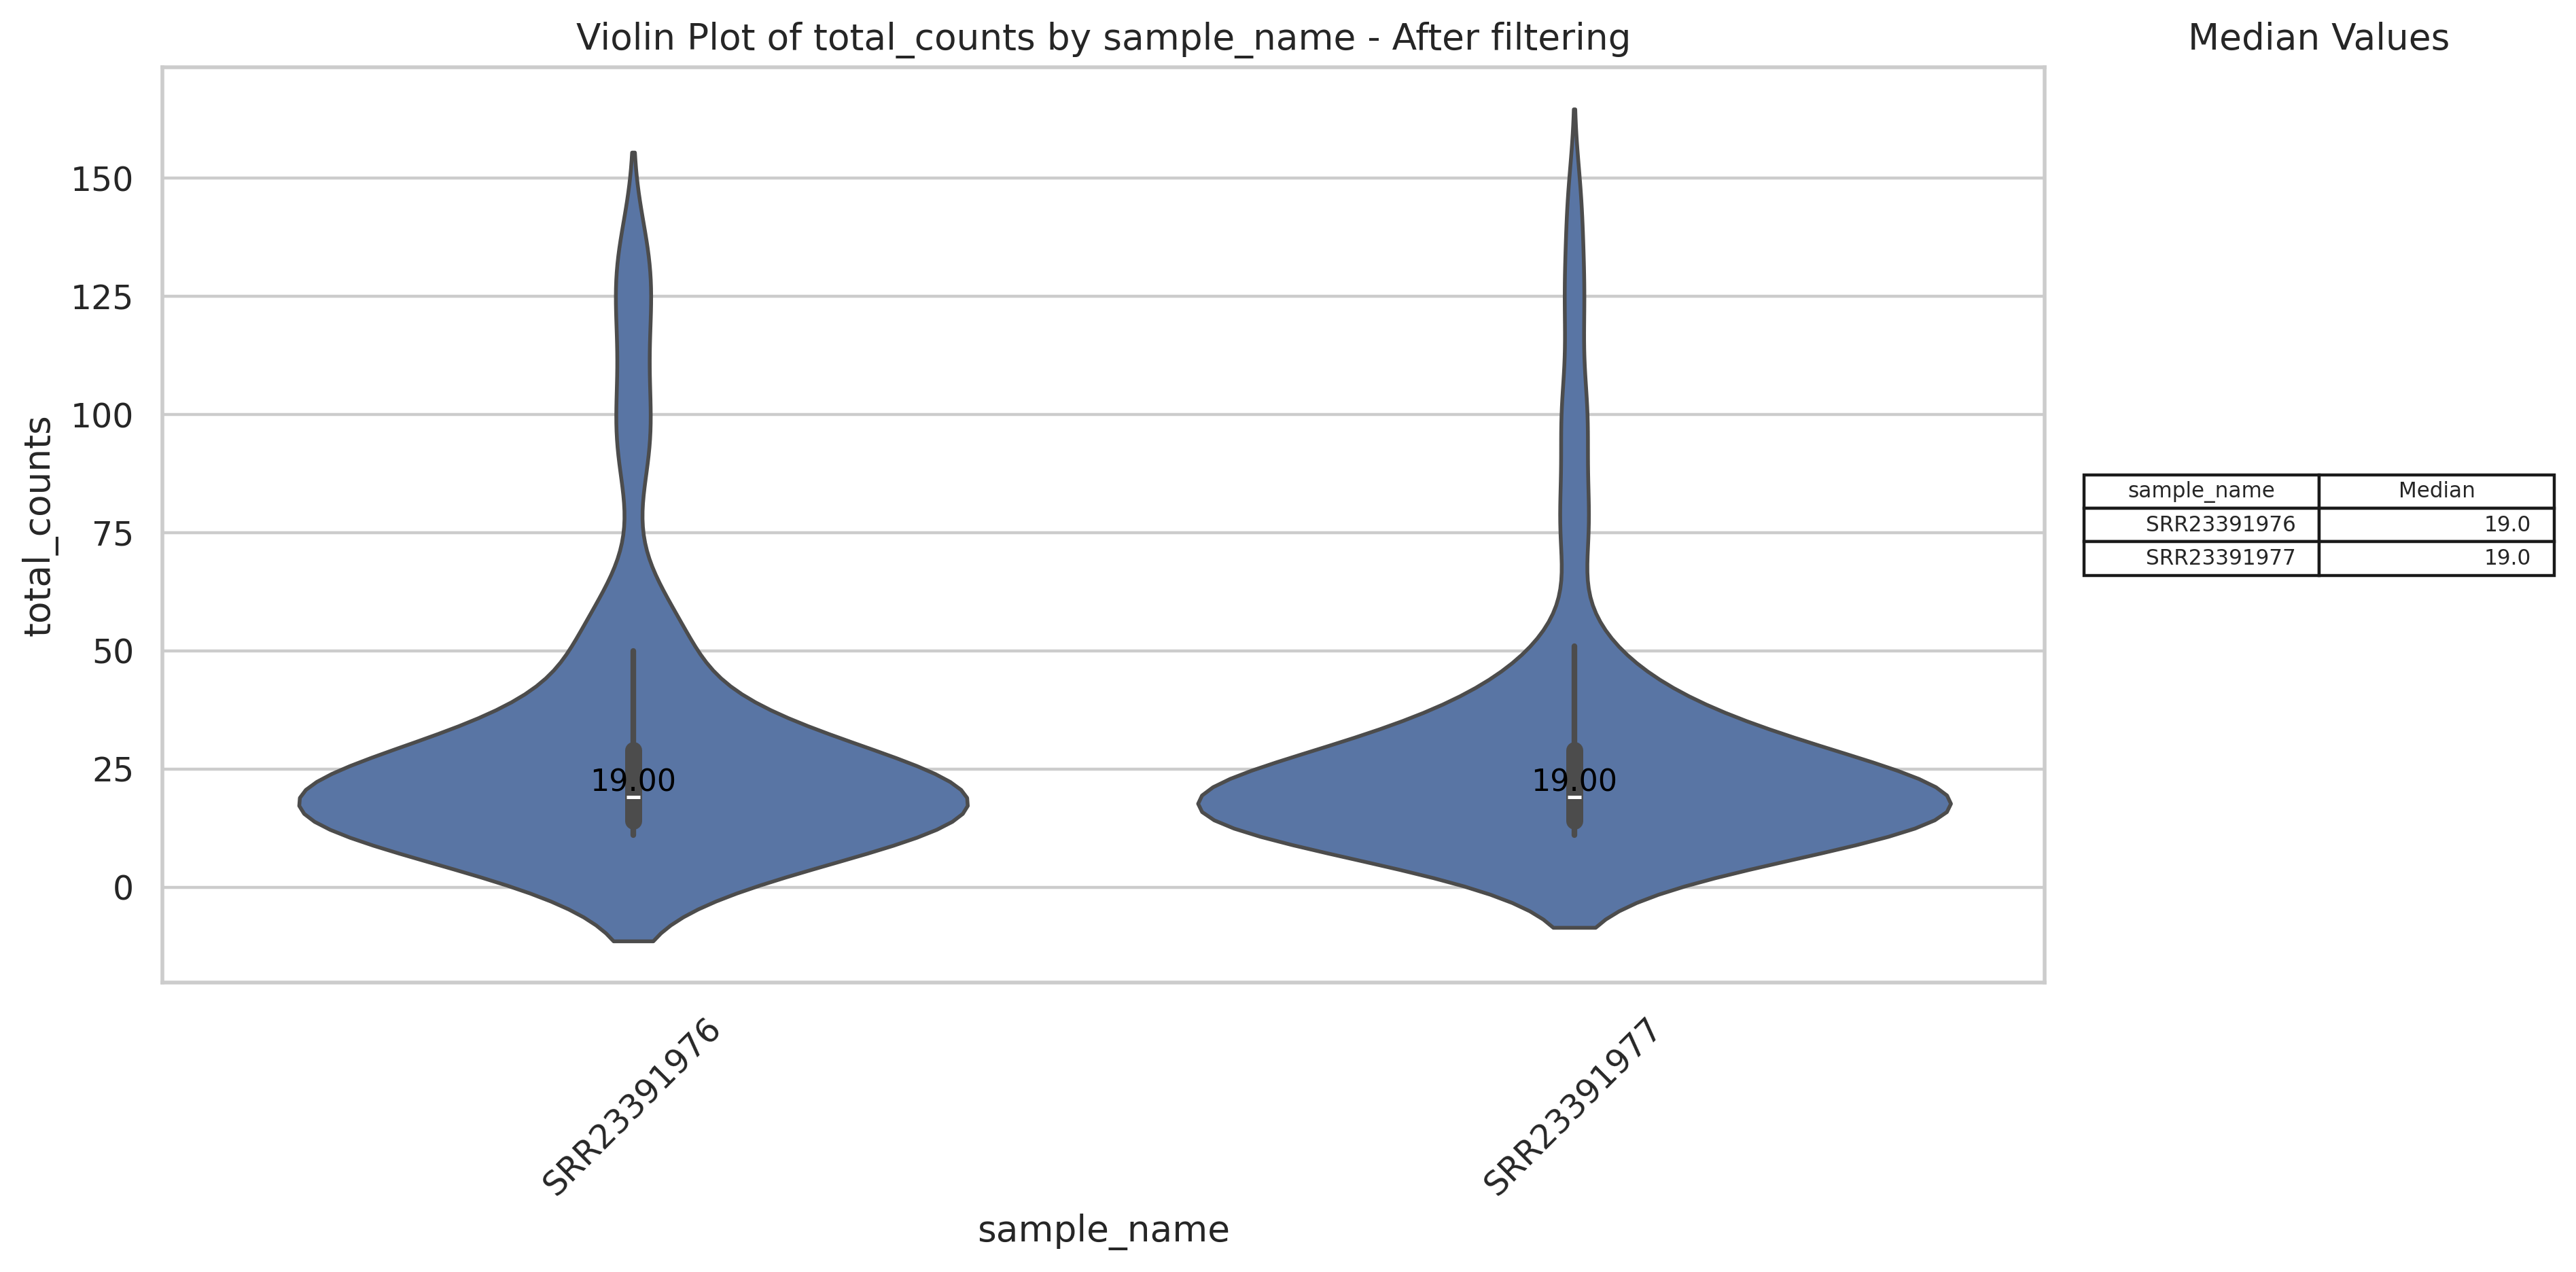

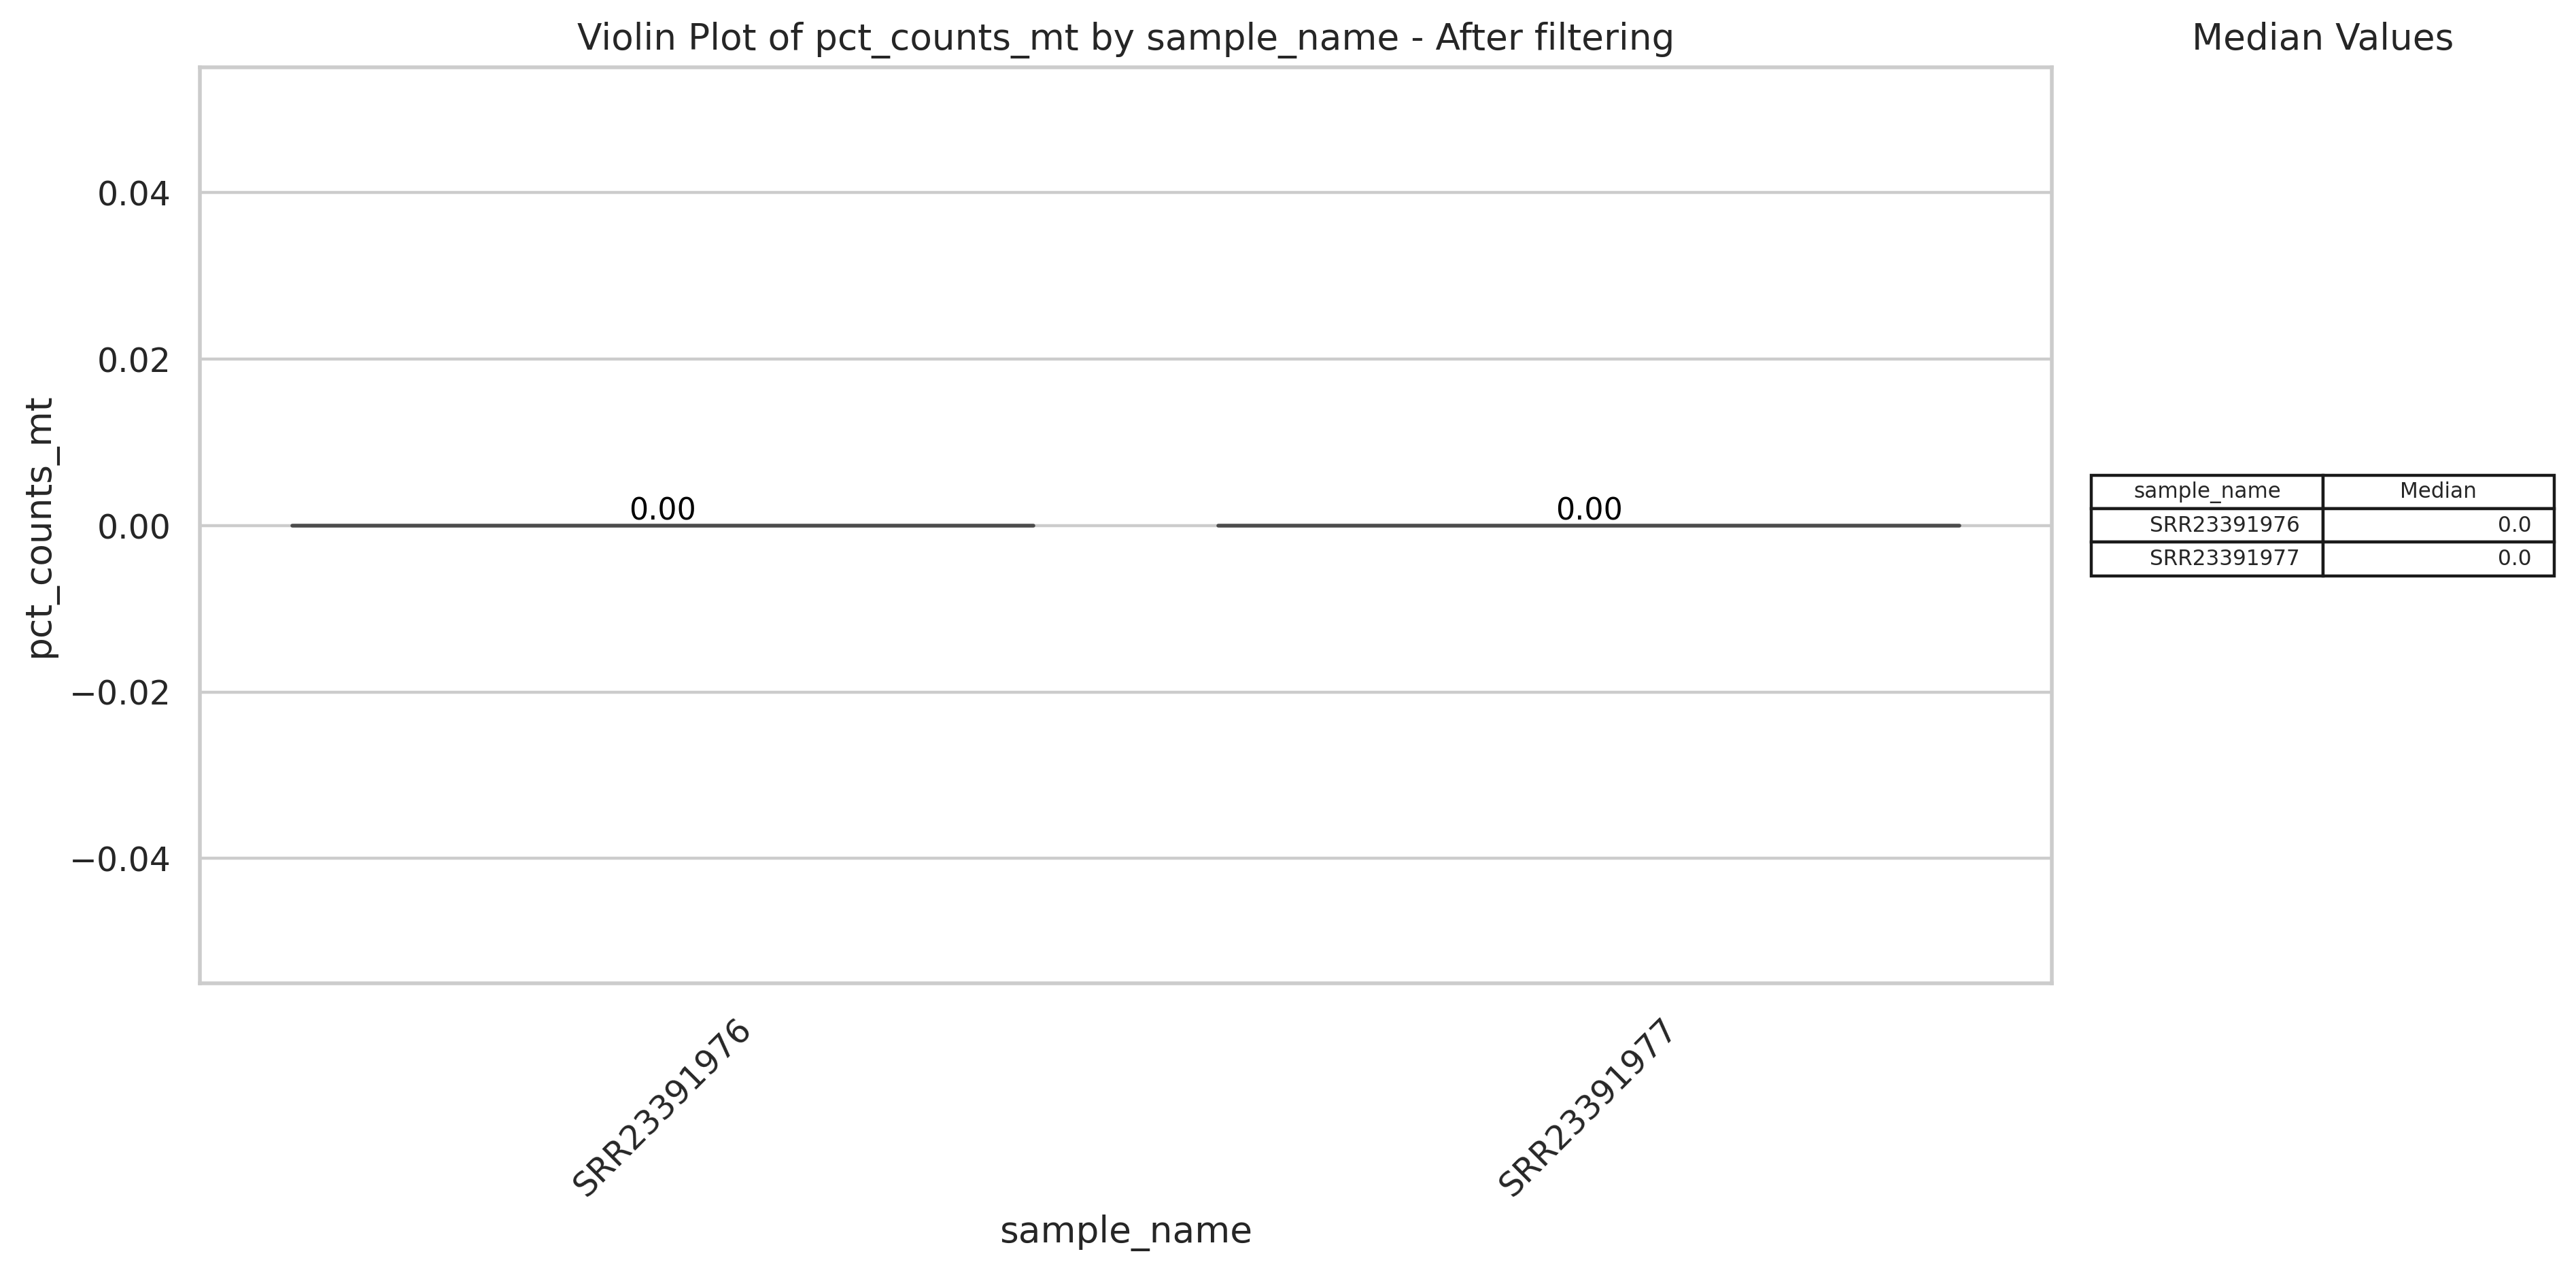

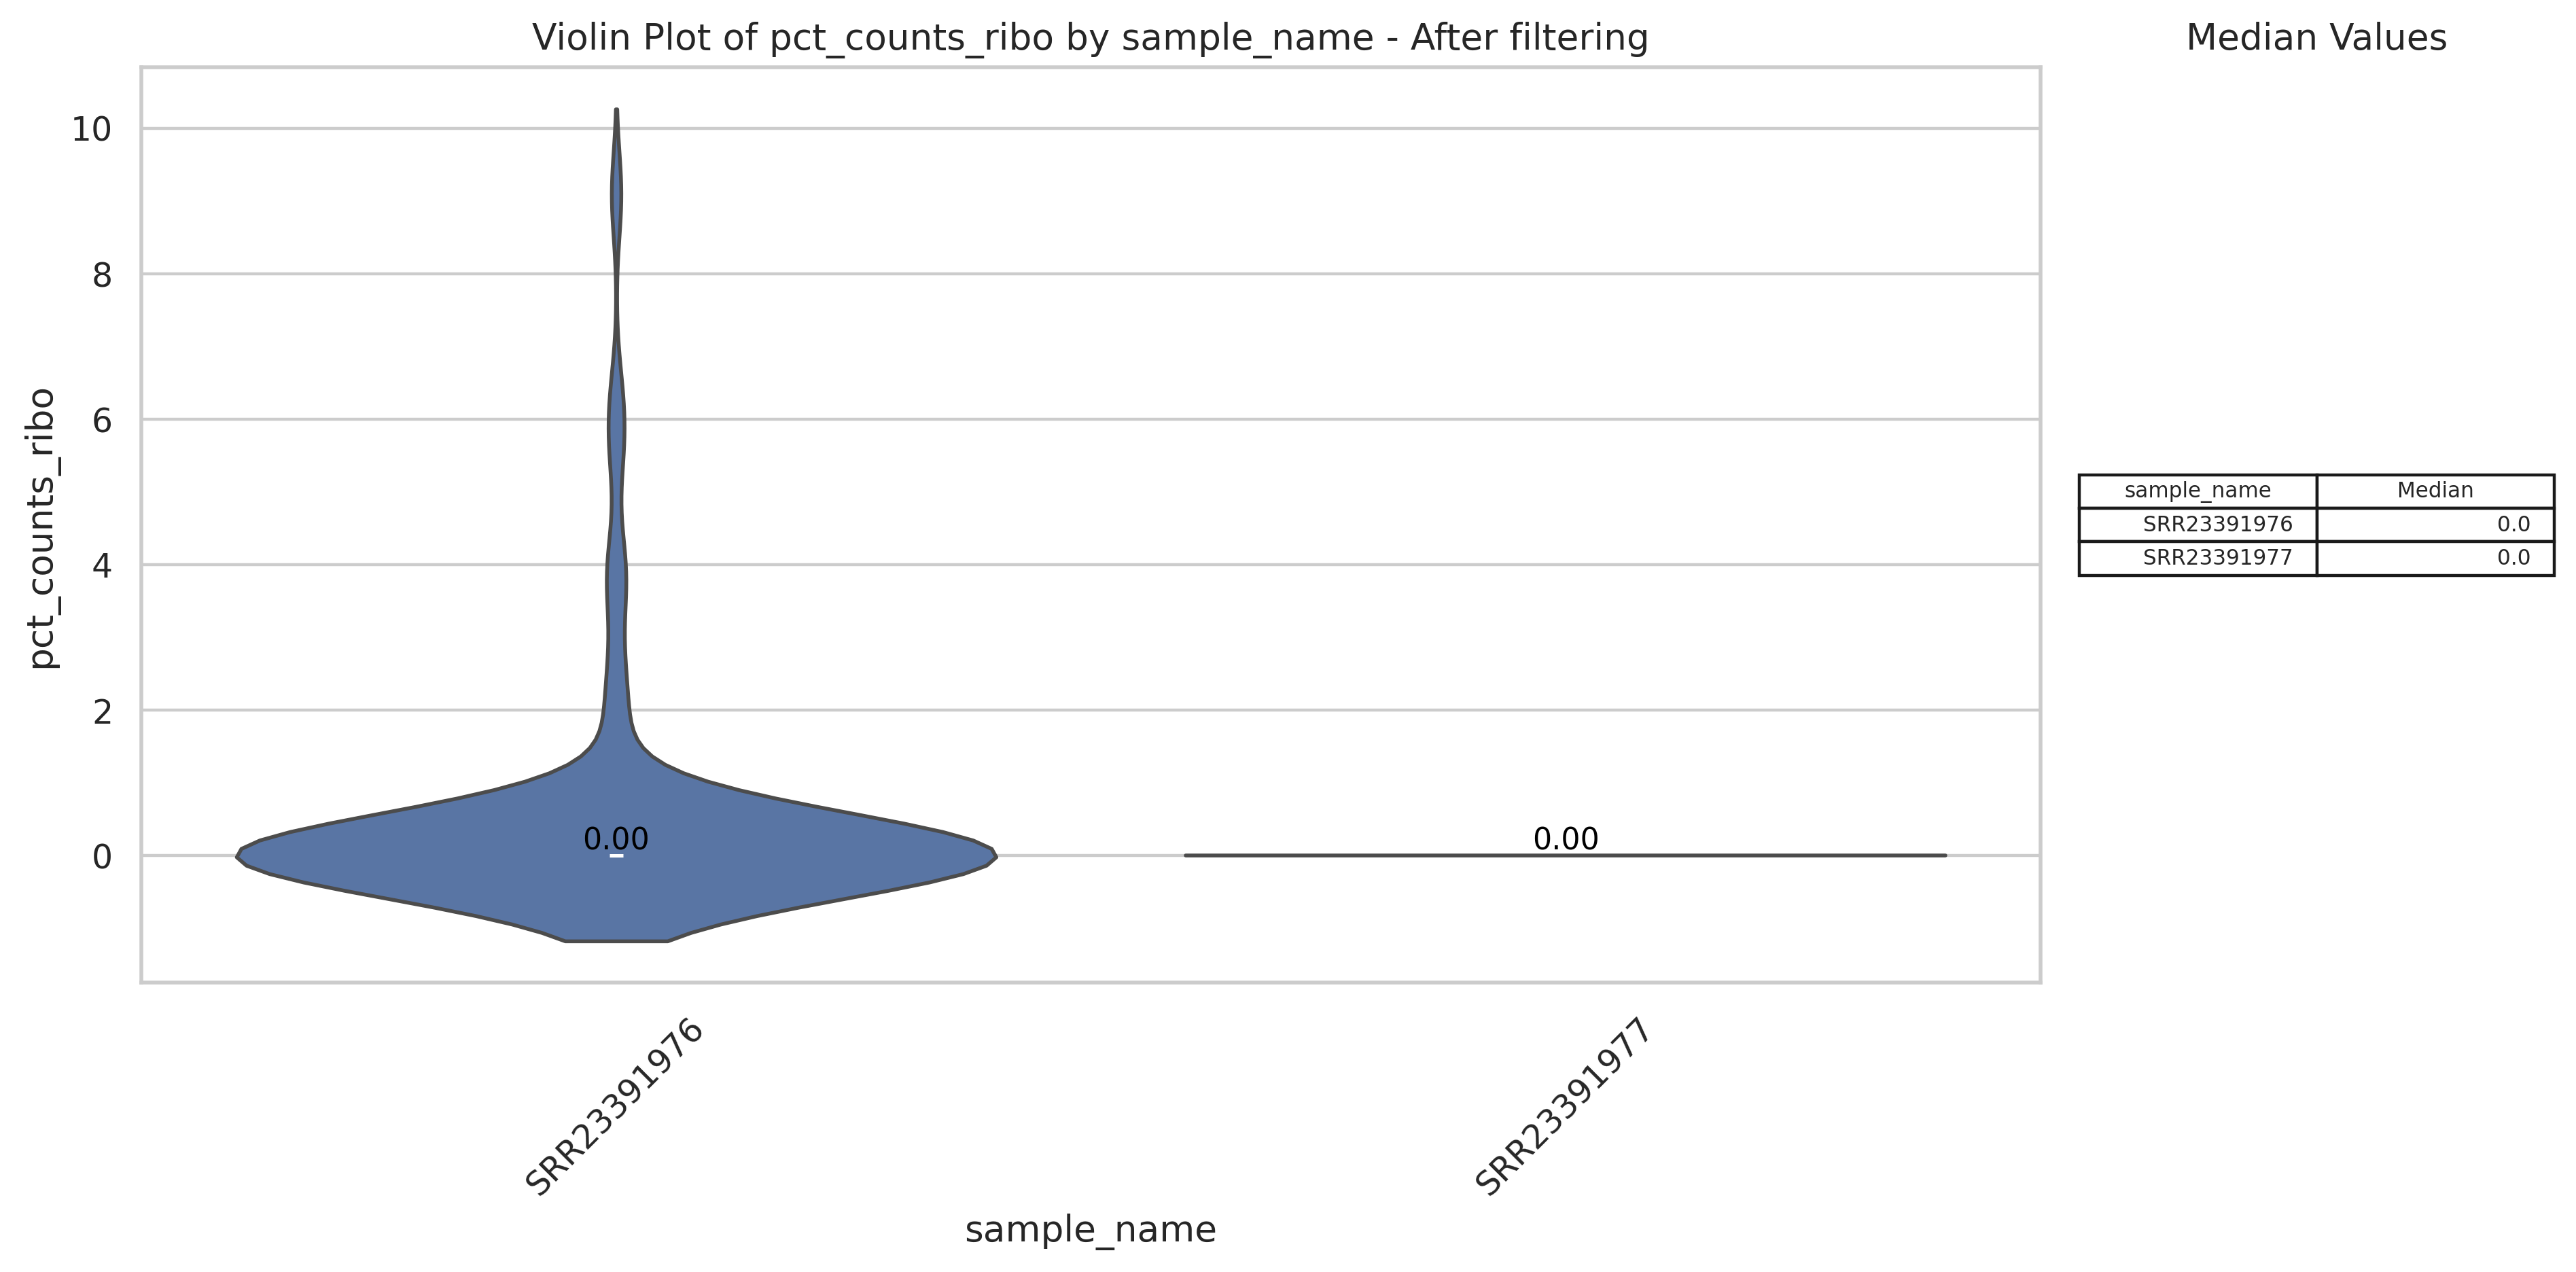

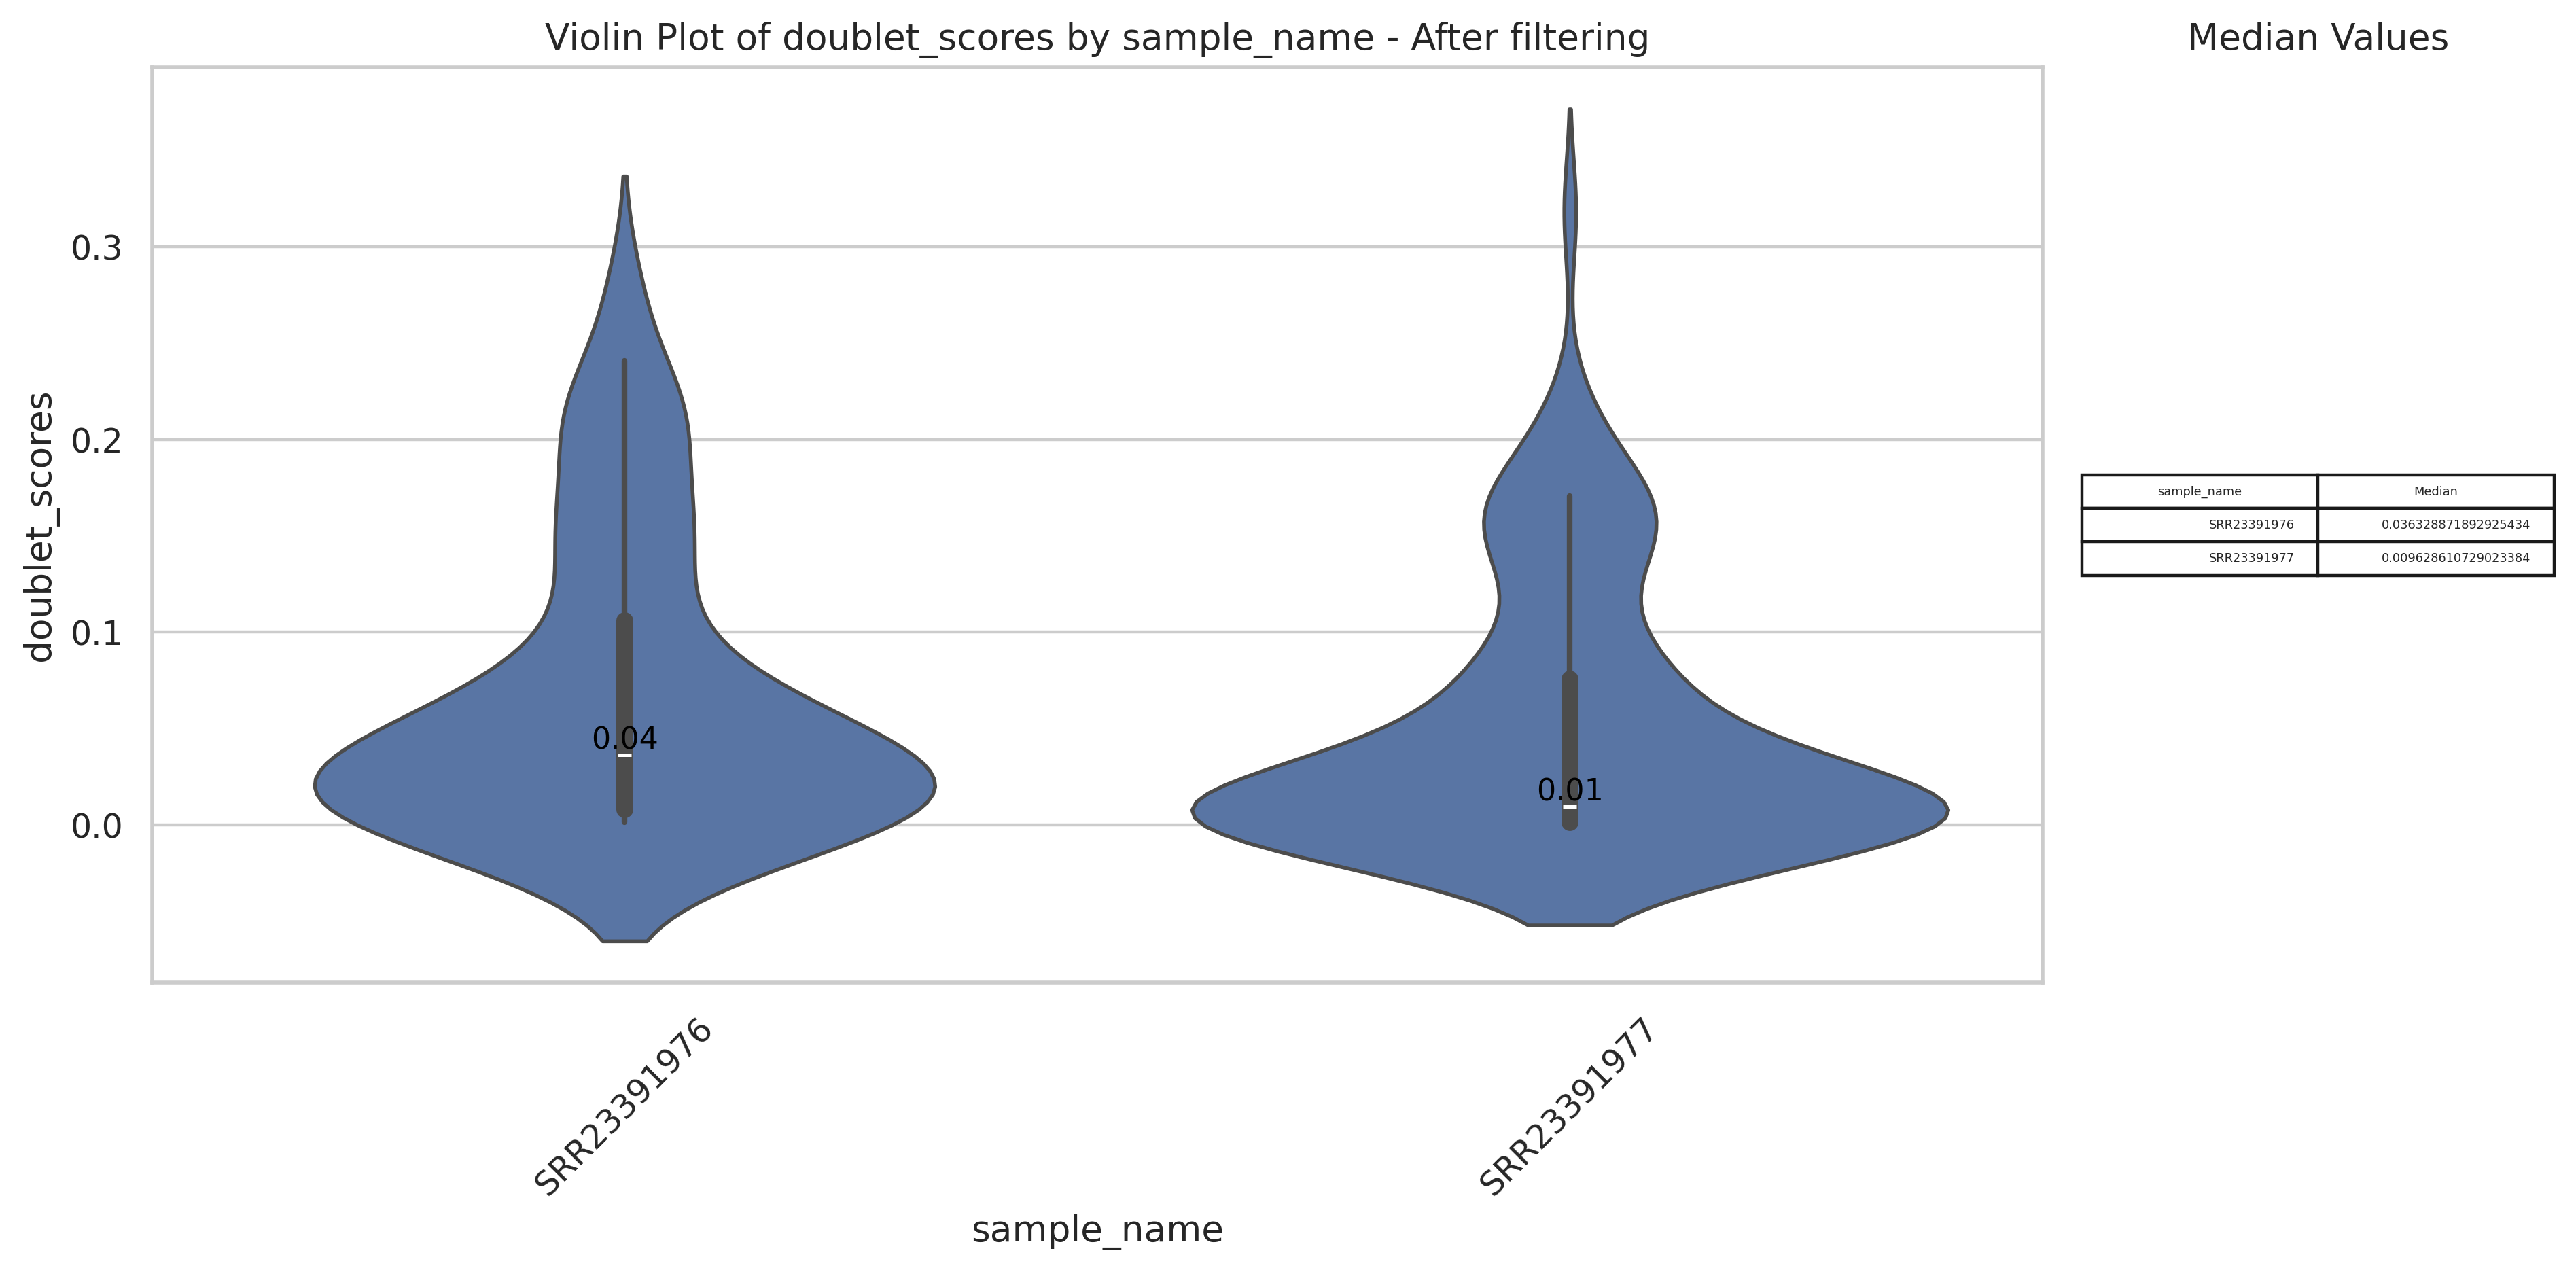

In [46]:
variables = 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'doublet_scores'

for var in variables:

    fig, ax = plt.subplots(figsize=(12, 6), ncols=2, gridspec_kw={'width_ratios': [4, 1]})

    sb.violinplot(data=filtered_object.obs, x='sample_name', y=var, ax=ax[0])
   
    medians = filtered_object.obs.groupby('sample_name')[var].median()

    for sample_name, median in medians.items():
        ax[0].text(sample_name, median, f'{median:.2f}', ha='center', va='bottom', color='black', fontsize=10)
    
    ax[0].set_title(f'Violin Plot of {var} by sample_name - After filtering')
    ax[0].set_xlabel('sample_name')
    ax[0].set_ylabel(var)
    ax[0].tick_params(axis='x', rotation=45)

    median_df = pd.DataFrame({'sample_name': medians.index, 'Median': medians.values})

    ax[1].axis('off')
    ax[1].table(cellText=median_df.values, colLabels=median_df.columns, loc='center')
    ax[1].set_title('Median Values')
    
    plt.tight_layout()
    plt.show()

## Data Export

In [47]:
filtered_object.raw = filtered_object.copy()

filtered_object.layers['raw_counts'] = filtered_object.X.copy()

filtered_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(filtered_object, inplace = False)["X"]
)

filtered_object

normalizing counts per cell
    finished (0:00:00)


/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 194 × 602
    obs: 'sample_name', 'n_counts', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'percent_chrY'
    var: 'ensembl', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'chromosome'
    layers: 'raw_counts', 'sqrt_norm'

In [48]:
filtered_object.obs['sample_name'].value_counts()

sample_name
SRR23391977    105
SRR23391976     89
Name: count, dtype: int64

In [49]:
filtered_object.var.dtypes

ensembl                   object
gene_name                 object
mt                          bool
ribo                        bool
n_cells_by_counts          int64
mean_counts              float64
log1p_mean_counts        float64
pct_dropout_by_counts    float64
total_counts               int64
log1p_total_counts       float64
chromosome                object
dtype: object

In [50]:
filtered_object.var['mt'].value_counts()

mt
False    602
Name: count, dtype: int64

In [51]:
filtered_object.var['mt'] = filtered_object.var['mt'].astype(str)

In [52]:
print(filtered_object.var.dtypes)

ensembl                   object
gene_name                 object
mt                        object
ribo                        bool
n_cells_by_counts          int64
mean_counts              float64
log1p_mean_counts        float64
pct_dropout_by_counts    float64
total_counts               int64
log1p_total_counts       float64
chromosome                object
dtype: object


In [53]:
filtered_object.var

,ensembl,gene_name,mt,ribo,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,chromosome
gene_name,,,,,,,,,,,
NPHP4,ENSG00000131697,NPHP4,False,False,22,0.024499,0.024204,97.550111,22,3.135494,1
CAMTA1,ENSG00000171735,CAMTA1,False,False,11,0.012249,0.012175,98.775056,11,2.484907,1
TMEM201,ENSG00000188807,TMEM201,False,False,14,0.015590,0.015470,98.440980,14,2.708050,1
KAZN,ENSG00000189337,KAZN,False,False,11,0.012249,0.012175,98.775056,11,2.484907,1
EBNA1BP2,ENSG00000117395,EBNA1BP2,False,False,10,0.011136,0.011074,98.886414,10,2.397895,1
...,...,...,...,...,...,...,...,...,...,...,...
IL1RAPL2,ENSG00000189108,IL1RAPL2,False,False,10,0.011136,0.011074,98.886414,10,2.397895,X
TENM1,ENSG00000009694,TENM1,False,False,19,0.022272,0.022027,97.884187,20,3.044522,X
nan,ENSG00000225689,NaN,False,False,16,0.017817,0.017661,98.218263,16,2.833213,X


In [54]:
filtered_object.var = filtered_object.var.rename(columns={'gene_name': 'gene_symbol'})
filtered_object.var = filtered_object.var.reset_index()
filtered_object.var

,gene_name,ensembl,gene_symbol,mt,ribo,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,chromosome
0,NPHP4,ENSG00000131697,NPHP4,False,False,22,0.024499,0.024204,97.550111,22,3.135494,1
1,CAMTA1,ENSG00000171735,CAMTA1,False,False,11,0.012249,0.012175,98.775056,11,2.484907,1
2,TMEM201,ENSG00000188807,TMEM201,False,False,14,0.015590,0.015470,98.440980,14,2.708050,1
3,KAZN,ENSG00000189337,KAZN,False,False,11,0.012249,0.012175,98.775056,11,2.484907,1
4,EBNA1BP2,ENSG00000117395,EBNA1BP2,False,False,10,0.011136,0.011074,98.886414,10,2.397895,1
...,...,...,...,...,...,...,...,...,...,...,...,...
597,IL1RAPL2,ENSG00000189108,IL1RAPL2,False,False,10,0.011136,0.011074,98.886414,10,2.397895,X
598,TENM1,ENSG00000009694,TENM1,False,False,19,0.022272,0.022027,97.884187,20,3.044522,X
599,nan,ENSG00000225689,NaN,False,False,16,0.017817,0.017661,98.218263,16,2.833213,X
600,FGF13,ENSG00000129682,FGF13,False,False,9,0.011136,0.011074,98.997773,10,2.397895,X


In [55]:
filtered_object.raw.var.index.name = 'gene_id'  

In [56]:
filtered_object.write_h5ad(f'../ncbi_sra/data/PRJNA847259_sra_filtered_sk_{timestamp}.h5ad')